In [2]:
# Install required packages for Python 3.11
%pip install numpy pandas matplotlib nltk scikit-learn

# Import pickle (built-in module)
import pickle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1><center> Assignment 1: EDA United Nations General Debate Corpus  </center></h1>

We are now going to give the first steps into exploring the United Nations General Debate Corpus. <span style="color:red">This dataset will be used in Group Assignment I (due date, Monday 29 September, 23:59)</span>. It is expected that you will pose a question about the dataset, explore it, and combine it with other datasets (e.g., the Happiness Report 2023 that we've been using, or the International Trade Dataset, or any other of your choice).

We will use the *the UN General Debate Corpus (UNGDC)*, which introduces the corpus of texts of UN General Debate statements from 1946 (Session 1) to 2023 (Session 78). More info [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y). Make sure to download the file <code>UNGDC_1946-2024.tar.gz</code> and extract the folder <code>TXT/</code> to the same directory as the current Jupyter notebook.

Notice that the 80th session of the UN General Assembly - where the 2025 debates will happen - will occur in September 2024, precisely during the time you'll be working in Assignment 1. More info [here](https://www.un.org/en/ga/).

You might find useful to have a dataset with the full name and 3-code description of countries. You can find that data [here](https://unstats.un.org/unsd/methodology/m49/overview/). Download the corresponding CSV file (named 'UNSD — Methodology.csv') and place it into the same folder as this notebook.

We will start by loading the speeches text to a table:

In [3]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data = []

for session in sessions:
    directory = "./TXT/Session " + str(session) + " - " + str(1945 + session)
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist. Skipping session {session}.")
        continue
    for filename in os.listdir(directory):
        if filename[0] == ".":  # ignore hidden files
            continue
        try:
            with open(os.path.join(directory, filename), encoding='utf-8') as f:
                splt = filename.split("_")
                data.append([session, 1945 + session, splt[0], f.read()])
        except UnicodeDecodeError as e:
            print(f"Encoding error in file {filename}: {e}. Skipping.")
        except Exception as e:
            print(f"Error reading file {filename}: {e}. Skipping.")

df_speech = pd.DataFrame(data, columns=['Session', 'Year', 'ISO-alpha3 Code', 'Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,WSM,"Mr. President,\nDistinguished delegates,\nLadi..."
8477,75,2020,YEM,In the name of God the Merciful and the Compas...
8478,75,2020,ZAF,"President of the General Assembly, Secretary-G..."
8479,75,2020,ZMB,"Your excellency Mr. Volkan Bozkir, President o..."
8480,75,2020,ZWE,"Your Excellency, Ambassador Volkan Bozkir, Pre..."


Download the 'UNSD — Methodology.csv' ([link](https://unstats.un.org/unsd/methodology/m49/overview/)) file and and try to load it. Please check what is the separator used. Why is that separator used?

In [4]:
df_codes = pd.read_csv('UNSD_Methodology.csv', sep=';')
df_codes.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


**Q1: Can you create a merged DataFrame? — merge between df_codes and df_speech according to ISO-alpha3 and composed of columns \["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Least Developed Countries (LDC)", "Session", "Year", "Speech"\]? It would be convinient to have index as (Year, 'ISO-alpha3 Code')**

In [5]:
df_un_merged = pd.merge(df_speech, df_codes, on='ISO-alpha3 Code', how='left')
df_un_merged = df_un_merged[["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Least Developed Countries (LDC)", "Session", "Year", "Speech"]]
df_un_merged.set_index(['Year', 'ISO-alpha3 Code'], inplace=True)
df_un_merged.head()

Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 ALB                     Albania      Europe   
     ARG                   Argentina    Americas   
     AUS                   Australia     Oceania   
     AUT                     Austria      Europe   
     BEL                     Belgium      Europe   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 ALB                              Southern Europe   
     ARG              Latin America and the Caribbean   
     AUS                    Australia and New Zealand   
     AUT                               Western Europe   
     BEL                               Western Europe   

                     Least Developed Countries (LDC)  Session  \
Year ISO-alpha3 Code                                            
1970 ALB                                         NaN       25   
     ARG                                         NaN       25   
     AUS                                         NaN       25   
     AUT                                         NaN       25   
     BEL                                         NaN       25   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 ALB              33: May I first convey to our President the co...  
     ARG              177.\t : It is a fortunate coincidence that pr...  
     AUS              100.\t  It is a pleasure for me to extend to y...  
     AUT              155.\t  May I begin by expressing to Ambassado...  
     BEL              176. No doubt each of us, before coming up to ...

We are now going to use NLTK

Please run the cell below to import NLTK and download the needed resources. In case of errors, please see those two Github issues: [initial bug report](https://github.com/nltk/nltk/issues/3308) [latest fix attempt](https://github.com/nltk/nltk/issues/3416)

In [6]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mariu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mariu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mariu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mariu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Let us now see some examples of word analysis with NLTK:

Which were the most frequent words used in the Austrian Speech in 1970?

In [7]:
from nltk.probability import FreqDist
from nltk import word_tokenize

# load text of Austria in 1970
text = df_un_merged.loc[1970,'AUT']["Speech"]

# tokenize words
words = word_tokenize(text)

# compute word frequency
freq = FreqDist(words)

# show 30 most frequent words
freq.most_common(30)

[('the', 383),
 ('of', 268),
 (',', 180),
 ('to', 163),
 ('.', 160),
 ('and', 116),
 ('in', 104),
 ('a', 91),
 ('that', 55),
 ('by', 39),
 ('this', 39),
 ('for', 39),
 ('which', 38),
 ('be', 35),
 ('on', 34),
 ('is', 32),
 ('United', 30),
 ('The', 29),
 ('Nations', 28),
 ('as', 27),
 ('Austria', 26),
 ('our', 23),
 ('with', 23),
 ('I', 22),
 ('international', 22),
 ('it', 22),
 ('has', 21),
 ('States', 21),
 ('all', 20),
 ('its', 20)]

<Axes: xlabel='Samples', ylabel='Counts'>

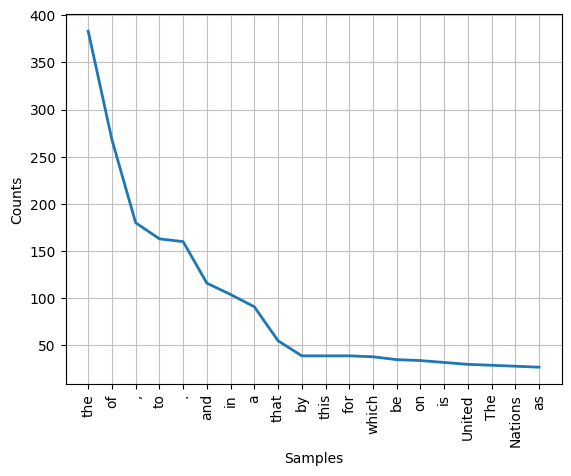

In [8]:
# plot the histogram with the top most used words
freq.plot(20)

Notice that the most frequent words are not that informative about the Austrian speech (the, of, to...). These words are often called *stop-words*. These words are generally filtered out before processing text (natural language). These are actually some of the most common words in any language (articles, prepositions, pronouns, conjunctions, etc) but do not add much information to the text. Let's now use NLTK to filter those words

<Axes: xlabel='Samples', ylabel='Counts'>

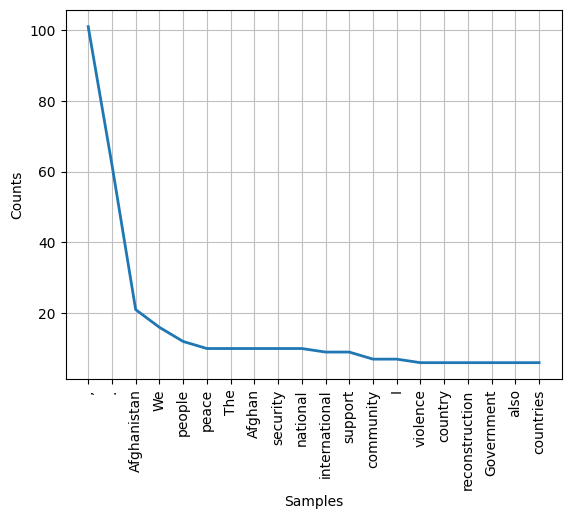

In [9]:
from nltk.corpus import stopwords

def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    for w in words:
        if (w not in sw):
            no_sw.append(w)
    return no_sw

text = df_un_merged.loc[2002,"AFG"]["Speech"]

words = word_tokenize(text)
words = preprocess(words)
freq = FreqDist(words)

freq.plot(20)

**Q2: Can you change the method preprocess to put all words in lower case, remove punctuation and remove non-informative words (e.g., United Nations)?**

Tip: the method isalpha() might be useful

<Axes: xlabel='Samples', ylabel='Counts'>

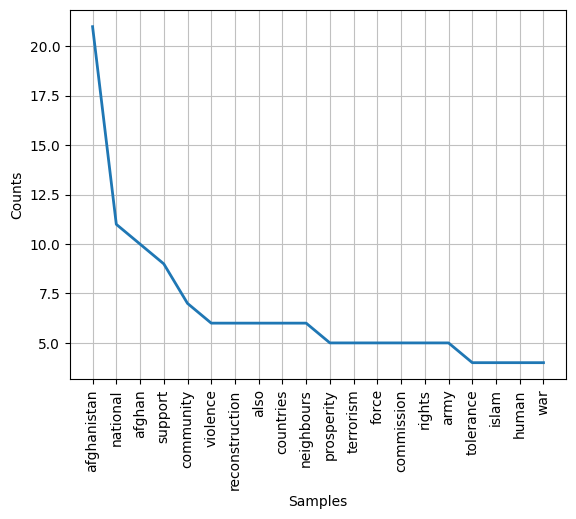

In [10]:
from nltk.corpus import stopwords

def preprocess(words):
    sw = stopwords.words("english")
    # Add additional non-informative words
    sw.extend(["united", "nations", "international", "organization", "assembly", "general", "delegation", "government", "people", "country", "world", "peace", "security", "development", "cooperation", "resolution", "committee", "secretary", "president", "ambassador", "excellency", "mr", "mrs", "ms", "sir", "madam"])
    no_sw = []
    for w in words:
        w = w.lower()  # Convert to lowercase
        if w.isalpha() and w not in sw:  # Remove punctuation and non-informative words
            no_sw.append(w)
    return no_sw

text = df_un_merged.loc[2002,"AFG"]["Speech"]
words = word_tokenize(text)
words = preprocess(words)
freq = FreqDist(words)
freq.plot(20)

A regular expression is a sequence of characters that specifies a pattern. Usually, such patterns are used by to find, match, replace sub-strings within a document. Regular expressions have a particular syntax and are often useful to clean and pre-process textual data. Here one example where the regular expression 'afg.\*' is used to match any word that starts with afg and is followed by any character.

In [11]:
# Regular expression example
s = set({})
import re
for w in words:
    if re.match('afg.*n$', w):
        s.add(w)
print(s)

{'afghan', 'afghanistan'}


Another useful usage of NLTK is performing sentiment analysis.

Sentiment analysis can be seen as the process of automatically classifying text into positive or negative sentiment categories. With NLTK, you can employ these algorithms without effort. This was also called opinion mining.

In the political field, sentiment analysis is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level or to derive the opinion or attitude of a speaker.

NLTK implements VADER (Valence Aware Dictionary and sEntiment Reasoner), which is a lexicon and rule-based sentiment analysis. VADER uses a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

NLTK implements VADER through the module SentimentIntensityAnalyzer. Below an example of application (with natural limitations as VADER is specifically attuned to sentiments expressed in **social media**):

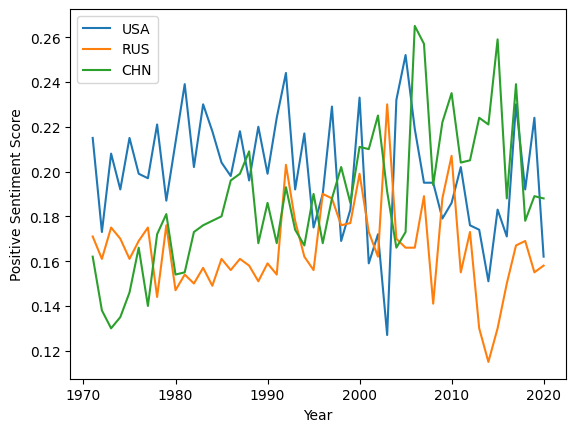

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt

sia = SentimentIntensityAnalyzer()

vecUSA = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"USA"]["Speech"])['pos'] for i in np.arange(1971, 2021)]
vecRUS = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"RUS"]["Speech"])['pos'] for i in np.arange(1971, 2021)]
vecCHN = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"CHN"]["Speech"])['pos'] for i in np.arange(1971, 2021)]

fig, ax = plt.subplots()
ax.plot(np.arange(1971, 2021), vecUSA, label='USA')
ax.plot(np.arange(1971, 2021), vecRUS, label='RUS')
ax.plot(np.arange(1971, 2021), vecCHN, label='CHN')
ax.set_xlabel('Year')
ax.set_ylabel('Positive Sentiment Score')

ax.legend()
plt.show()

## Topic Analysis: 5 Random Countries Over 20 Years

Let's analyze speech topics for 5 randomly selected countries over the last 20 years (2004-2024), sampling every 4 years. We'll use topic modeling to identify key themes in their speeches.

In [13]:
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import defaultdict

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define the years we want to analyze (every 4 years for the last 20 years)
analysis_years = [2004, 2008, 2012, 2016, 2020]

# Get all available countries in our dataset
available_countries = df_un_merged.index.get_level_values('ISO-alpha3 Code').unique()
print(f"Total countries available: {len(available_countries)}")

# Select 5 random countries
selected_countries = random.sample(list(available_countries), 5)
print(f"Selected countries: {selected_countries}")

# Get country names for the selected countries
country_names = {}
for country in selected_countries:
    try:
        country_name = df_un_merged.loc[(df_un_merged.index.get_level_values('ISO-alpha3 Code') == country), 'Country or Area'].iloc[0]
        country_names[country] = country_name
    except:
        country_names[country] = country
        
print("Country names:")
for code, name in country_names.items():
    print(f"  {code}: {name}")

Total countries available: 200
Selected countries: ['FSM', 'IRQ', 'BOL', 'PSE', 'AFG']
Country names:
  FSM: Micronesia (Federated States of)
  IRQ: Iraq
  BOL: Bolivia (Plurinational State of)
  PSE: State of Palestine
  AFG: Afghanistan


In [14]:
# Collect speeches for selected countries and years
speeches_data = []
speech_texts = []

for country in selected_countries:
    for year in analysis_years:
        try:
            speech = df_un_merged.loc[(year, country), 'Speech']
            speeches_data.append({
                'country': country,
                'country_name': country_names[country],
                'year': year,
                'speech': speech
            })
            speech_texts.append(speech)
            print(f"Found speech for {country} ({country_names[country]}) in {year}")
        except KeyError:
            print(f"No speech found for {country} ({country_names[country]}) in {year}")

print(f"\nTotal speeches collected: {len(speeches_data)}")

# Display the data structure
import pandas as pd
speeches_df = pd.DataFrame(speeches_data)
print("\nSpeeches summary:")
print(speeches_df.groupby(['country', 'country_name']).size().reset_index(name='speeches_count'))

Found speech for FSM (Micronesia (Federated States of)) in 2004
Found speech for FSM (Micronesia (Federated States of)) in 2008
Found speech for FSM (Micronesia (Federated States of)) in 2012
Found speech for FSM (Micronesia (Federated States of)) in 2016
Found speech for FSM (Micronesia (Federated States of)) in 2020
Found speech for IRQ (Iraq) in 2004
Found speech for IRQ (Iraq) in 2008
Found speech for IRQ (Iraq) in 2012
Found speech for IRQ (Iraq) in 2016
Found speech for IRQ (Iraq) in 2020
Found speech for BOL (Bolivia (Plurinational State of)) in 2004
Found speech for BOL (Bolivia (Plurinational State of)) in 2008
Found speech for BOL (Bolivia (Plurinational State of)) in 2012
Found speech for BOL (Bolivia (Plurinational State of)) in 2016
Found speech for BOL (Bolivia (Plurinational State of)) in 2020
Found speech for PSE (State of Palestine) in 2004
Found speech for PSE (State of Palestine) in 2008
Found speech for PSE (State of Palestine) in 2012
Found speech for PSE (State of

In [15]:
# Enhanced preprocessing function for topic modeling
def preprocess_for_topics(text):
    """
    Enhanced preprocessing for topic modeling:
    - Tokenize
    - Convert to lowercase
    - Remove punctuation and non-alphabetic tokens
    - Remove stopwords and common UN terms
    - Filter short words
    """
    words = word_tokenize(text.lower())
    
    # Extended stopwords including UN-specific terms
    stop_words = set(stopwords.words('english'))
    un_stopwords = {
        'united', 'nations', 'international', 'organization', 'assembly', 
        'general', 'delegation', 'government', 'people', 'country', 'countries',
        'world', 'peace', 'security', 'development', 'cooperation', 'resolution', 
        'committee', 'secretary', 'president', 'ambassador', 'excellency', 
        'mr', 'mrs', 'ms', 'sir', 'madam', 'distinguished', 'delegates',
        'member', 'states', 'nation', 'also', 'would', 'could', 'should',
        'must', 'may', 'might', 'will', 'shall', 'today', 'year', 'years'
    }
    stop_words.update(un_stopwords)
    
    # Filter words: alphabetic, not in stopwords, length > 2
    filtered_words = [
        word for word in words 
        if word.isalpha() and word not in stop_words and len(word) > 2
    ]
    
    return ' '.join(filtered_words)

# Preprocess all speeches
print("Preprocessing speeches for topic modeling...")
processed_speeches = [preprocess_for_topics(speech) for speech in speech_texts]

# Remove empty speeches
valid_indices = [i for i, speech in enumerate(processed_speeches) if len(speech.strip()) > 0]
processed_speeches = [processed_speeches[i] for i in valid_indices]
valid_speeches_data = [speeches_data[i] for i in valid_indices]

print(f"Valid speeches after preprocessing: {len(processed_speeches)}")

# Show sample of processed text
if processed_speeches:
    print(f"\nSample processed speech (first 200 chars):")
    print(processed_speeches[0][:200] + "...")

Preprocessing speeches for topic modeling...
Valid speeches after preprocessing: 25

Sample processed speech (first 200 chars):
honoured opportunity speak session behalf pacific island federated micronesia behalf joseph urusemal allow extend congratulations election high office like recognize julian robert hunte saint lucia se...


In [16]:
# Topic modeling using Latent Dirichlet Allocation (LDA)
print("Performing topic modeling...")

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    max_features=100,  # Limit to top 100 terms
    min_df=2,          # Term must appear in at least 2 documents
    max_df=0.8,        # Term must appear in less than 80% of documents
    ngram_range=(1, 2) # Include both unigrams and bigrams
)

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(processed_speeches)
feature_names = vectorizer.get_feature_names_out()

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Feature names (first 10): {feature_names[:10]}")

# Fit LDA model
n_topics = 8  # Number of topics to extract
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=100,
    learning_method='batch'
)

lda.fit(tfidf_matrix)

print(f"\nLDA model fitted with {n_topics} topics")
print(f"Log likelihood: {lda.score(tfidf_matrix):.2f}")

Performing topic modeling...
TF-IDF matrix shape: (25, 100)
Feature names (first 10): ['achieve' 'afghan' 'afghanistan' 'among' 'arab' 'assistance' 'become'
 'bolivia' 'call' 'cent']

LDA model fitted with 8 topics
Log likelihood: -753.96


In [17]:
# Display topics with their top words
def display_topics(model, feature_names, n_top_words=10):
    """Display topics with their most important words"""
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_words = ', '.join(top_words)
        topics.append(topic_words)
        print(f"Topic {topic_idx + 1}: {topic_words}")
    return topics

print("Discovered Topics:")
print("=" * 50)
topic_words = display_topics(lda, feature_names, n_top_words=8)

Discovered Topics:
Topic 1: pacific, island, occupation, small, east, israel, palestine, climate change
Topic 2: pacific, island, occupation, small, east, israel, palestine, climate change
Topic 3: pacific, island, occupation, small, east, israel, palestine, climate change
Topic 4: micronesia, island, pacific, climate change, climate, small, sustainable, members
Topic 5: pacific, island, occupation, small, east, israel, palestine, climate change
Topic 6: bolivia, pacific, island, small, israel, social, natural, towards
Topic 7: palestinian, occupation, israel, palestine, israeli, east, land, small
Topic 8: iraq, afghanistan, iraqi, change, global, national, political, afghan


In [18]:
# Analyze topic distribution for each speech
doc_topic_dist = lda.transform(tfidf_matrix)

# Create comprehensive results dataframe
results_data = []
for i, speech_data in enumerate(valid_speeches_data):
    # Get dominant topic (highest probability)
    dominant_topic = doc_topic_dist[i].argmax()
    dominant_topic_prob = doc_topic_dist[i].max()
    
    # Get top 3 topics for this speech
    top_topics = doc_topic_dist[i].argsort()[-3:][::-1]
    top_probs = sorted(doc_topic_dist[i], reverse=True)[:3]
    
    results_data.append({
        'country': speech_data['country'],
        'country_name': speech_data['country_name'],
        'year': speech_data['year'],
        'dominant_topic': dominant_topic + 1,  # 1-indexed for readability
        'dominant_topic_prob': dominant_topic_prob,
        'topic_1': top_topics[0] + 1,
        'topic_1_prob': top_probs[0],
        'topic_2': top_topics[1] + 1,
        'topic_2_prob': top_probs[1],
        'topic_3': top_topics[2] + 1,
        'topic_3_prob': top_probs[2]
    })

results_df = pd.DataFrame(results_data)

print("Topic Analysis Results:")
print("=" * 50)
print(results_df[['country_name', 'year', 'dominant_topic', 'dominant_topic_prob']].to_string(index=False))

Topic Analysis Results:
                    country_name  year  dominant_topic  dominant_topic_prob
Micronesia (Federated States of)  2004               8             0.548984
Micronesia (Federated States of)  2008               8             0.522413
Micronesia (Federated States of)  2012               8             0.519118
Micronesia (Federated States of)  2016               8             0.520082
Micronesia (Federated States of)  2020               8             0.494523
                            Iraq  2004               8             0.803654
                            Iraq  2008               8             0.827248
                            Iraq  2012               8             0.848992
                            Iraq  2016               8             0.826638
                            Iraq  2020               8             0.860348
Bolivia (Plurinational State of)  2004               8             0.585696
Bolivia (Plurinational State of)  2008               8          

<Figure size 1500x1000 with 0 Axes>

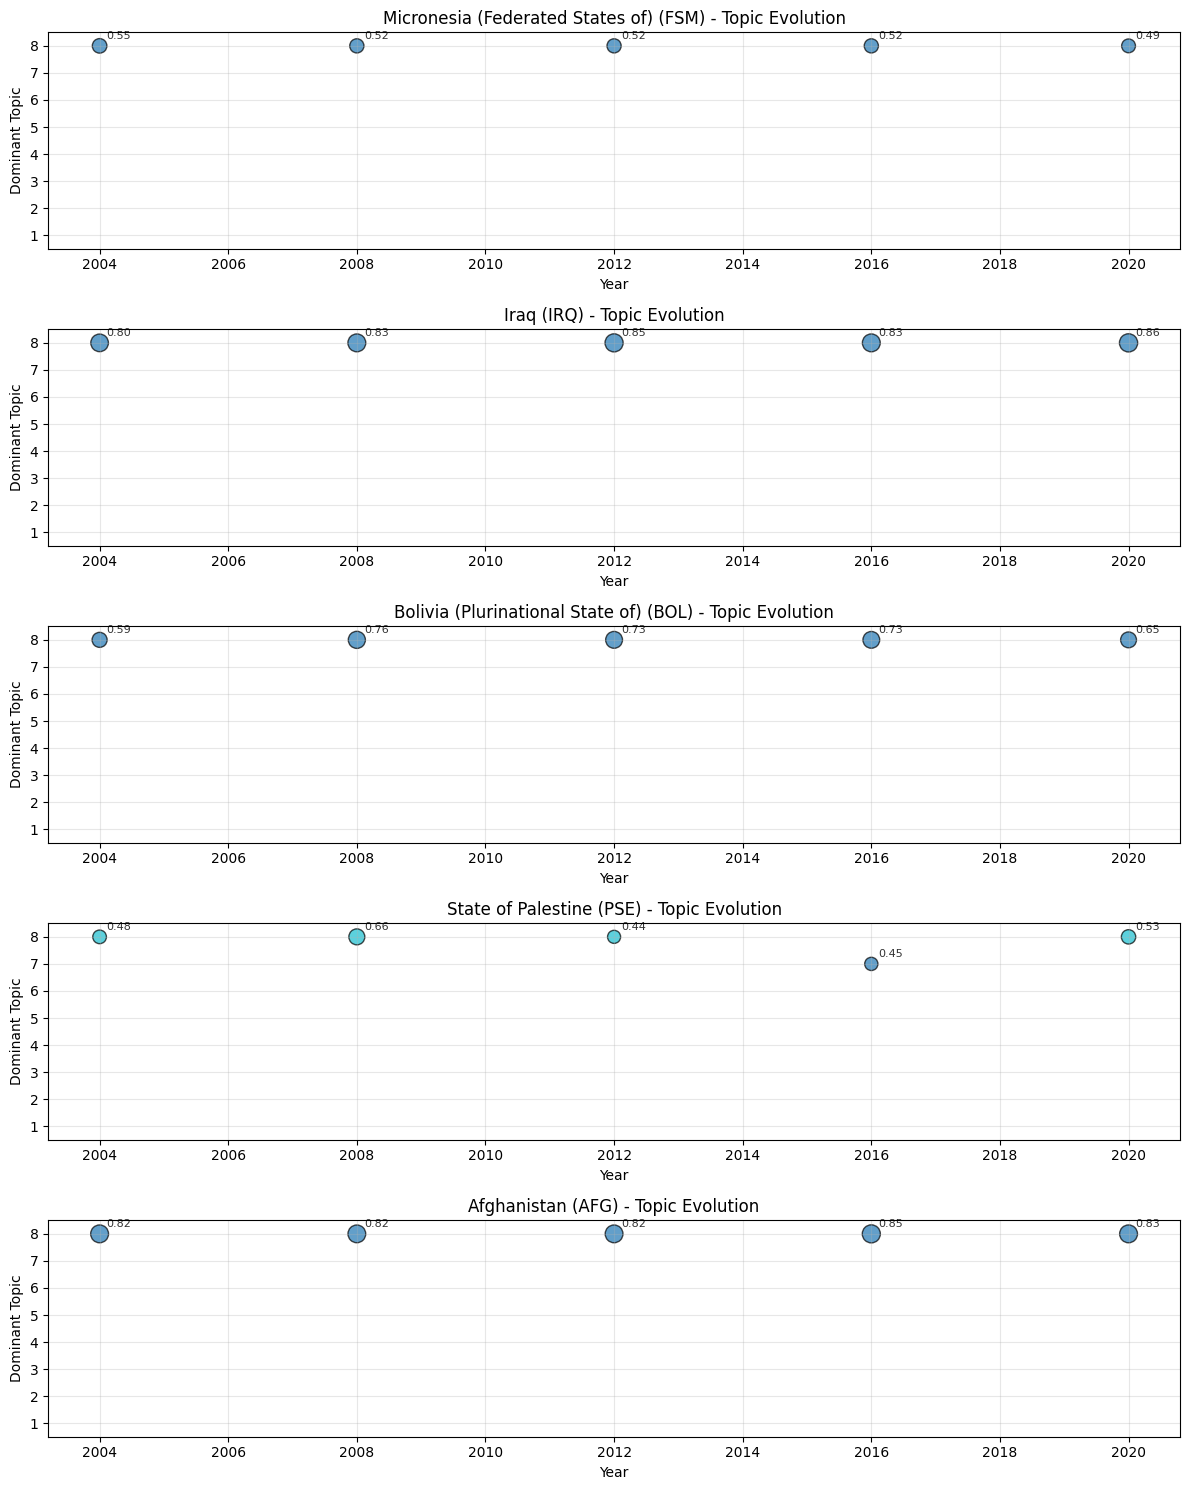


Note: Circle size represents the probability of the dominant topic
Larger circles = higher confidence in topic assignment


In [19]:
# Visualization: Topic evolution over time for each country
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Create subplots for each country
n_countries = len(selected_countries)
fig, axes = plt.subplots(n_countries, 1, figsize=(12, 3*n_countries))
if n_countries == 1:
    axes = [axes]

for i, country in enumerate(selected_countries):
    country_data = results_df[results_df['country'] == country]
    
    if len(country_data) > 0:
        ax = axes[i]
        
        # Plot dominant topics over time
        years = country_data['year'].values
        topics = country_data['dominant_topic'].values
        probs = country_data['dominant_topic_prob'].values
        
        # Create scatter plot with topic colors
        scatter = ax.scatter(years, topics, c=topics, s=probs*200, 
                           cmap='tab10', alpha=0.7, edgecolors='black')
        
        ax.set_title(f"{country_names[country]} ({country}) - Topic Evolution")
        ax.set_xlabel("Year")
        ax.set_ylabel("Dominant Topic")
        ax.set_ylim(0.5, n_topics + 0.5)
        ax.set_yticks(range(1, n_topics + 1))
        ax.grid(True, alpha=0.3)
        
        # Add probability labels
        for j, (year, topic, prob) in enumerate(zip(years, topics, probs)):
            ax.annotate(f'{prob:.2f}', (year, topic), 
                       xytext=(5, 5), textcoords='offset points', 
                       fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

print("\nNote: Circle size represents the probability of the dominant topic")
print("Larger circles = higher confidence in topic assignment")

In [20]:
# Detailed topic analysis by country and year
print("Detailed Topic Analysis by Country:")
print("=" * 60)

for country in selected_countries:
    country_data = results_df[results_df['country'] == country].sort_values('year')
    country_name = country_names[country]
    
    print(f"\n{country_name} ({country}):")
    print("-" * 40)
    
    if len(country_data) == 0:
        print("No speeches found for analysis years")
        continue
    
    for _, row in country_data.iterrows():
        year = int(row['year'])
        topic = int(row['dominant_topic'])
        prob = row['dominant_topic_prob']
        
        print(f"  {year}: Topic {topic} ({prob:.3f} confidence)")
        print(f"       Keywords: {topic_words[topic-1]}")
        
        # Show top 3 topics for more context
        print(f"       Top 3 topics: {int(row['topic_1'])}({row['topic_1_prob']:.2f}), " +
              f"{int(row['topic_2'])}({row['topic_2_prob']:.2f}), " +
              f"{int(row['topic_3'])}({row['topic_3_prob']:.2f})")
        print()

# Summary statistics
print("\nSummary Statistics:")
print("=" * 30)
print(f"Total speeches analyzed: {len(results_df)}")
print(f"Countries: {len(selected_countries)}")
print(f"Years: {analysis_years}")
print(f"Topics discovered: {n_topics}")

# Most common topics across all speeches
topic_counts = results_df['dominant_topic'].value_counts().sort_index()
print(f"\nTopic frequency across all speeches:")
for topic_num, count in topic_counts.items():
    print(f"  Topic {topic_num}: {count} speeches ({count/len(results_df)*100:.1f}%)")
    print(f"    Keywords: {topic_words[topic_num-1]}")

Detailed Topic Analysis by Country:

Micronesia (Federated States of) (FSM):
----------------------------------------
  2004: Topic 8 (0.549 confidence)
       Keywords: iraq, afghanistan, iraqi, change, global, national, political, afghan
       Top 3 topics: 8(0.55), 4(0.33), 7(0.02)

  2008: Topic 8 (0.522 confidence)
       Keywords: iraq, afghanistan, iraqi, change, global, national, political, afghan
       Top 3 topics: 8(0.52), 4(0.33), 3(0.02)

  2012: Topic 8 (0.519 confidence)
       Keywords: iraq, afghanistan, iraqi, change, global, national, political, afghan
       Top 3 topics: 8(0.52), 4(0.35), 7(0.02)

  2016: Topic 8 (0.520 confidence)
       Keywords: iraq, afghanistan, iraqi, change, global, national, political, afghan
       Top 3 topics: 8(0.52), 4(0.36), 6(0.02)

  2020: Topic 8 (0.495 confidence)
       Keywords: iraq, afghanistan, iraqi, change, global, national, political, afghan
       Top 3 topics: 8(0.49), 4(0.35), 6(0.03)


Iraq (IRQ):
-------------------

## 20 SEP 2025

## Starting SDG dictionary and text scanning

In [21]:
# Create a comprehensive dictionary mapping Sustainable Development Goals (SDGs) to associated keywords

sdg_keywords = {
    1: [  # No Poverty
        "poverty", "income distribution", "wealth distribution", "socio economic", "socio-economic", 
        "socioeconomic", "homeless", "low-income", "low income", "affordab*", "disparity", "welfare", 
        "social safety", "developing country", "vulnerability", "precarity", "precarious", "pro-poor"
    ],
    
    2: [  # Zero Hunger
        "agricultur*", "nutrition", "food security", "food insecurity", "food-secure", "food system", 
        "child hunger", "food justice", "food scarcity", "food sovereignty", "food culture", "culinary", 
        "agro*", "permaculture", "indigenous crops", "regenerative agriculture", "urban agriculture", 
        "organic food", "biodynamic", "food literacy", "food education", "benefit sharing", 
        "access and benefit sharing (ABS)", "malnutrition", "end hunger", "food price", "zero hunger"
    ],
    
    3: [  # Good Health and Well-being
        "well being", "wellbeing", "well-being", "mental health", "public health", "global health", 
        "health care", "healthcare", "health issues", "mental wellness", "disabilit*", "sexual education", 
        "mindfulness", "holism", "illness", "health education", "communicable disease", "health determinants", 
        "vaccine", "substance abuse", "maternal mortality", "family planning", "hazardous chemicals", 
        "pollution", "health equity", "neonatal mortality", "infant mortality", "child health", 
        "road traffic accidents", "reproductive health", "epidemics", "universal health coverage"
    ],
    
    4: [  # Quality Education
        "equitable", "pedagogy", "knowledge", "worldview", "learning", "knowledges", "traditional knowledge", 
        "land-based knowledge", "place-based knowledge", "decolonial*", "anticolonial", "settler", 
        "equitable", "equity", "anti-racism", "racism", "anti-oppression", "oppression", "anti-discriminatory", 
        "early childhood development", "peace", "citizen", "sustainability teaching", "sustainability education", 
        "universal literacy", "basic literacy", "universal numeracy", "environmental education", 
        "education for sustainable development", "ecojustice education", "place-based education", 
        "humane education", "land-based learning", "nature-based education", "climate change education", 
        "vocational", "technical learning", "free education", "accessible education", "primary education", 
        "secondary education", "tertiary education"
    ],
    
    5: [  # Gender Equality
        "gender", "women", "girl", "queer", "female", "feminis*", "non-binary", "non binary", "sexes", 
        "LGBTQ*", "patriarchy", "transgender", "two-spirit", "gender equality", "violence against women", 
        "trafficking", "forced marriage"
    ],
    
    6: [  # Clean Water and Sanitation
        "water", "sanita*", "contamination", "arid", "drought", "hygien*", "sewage", "water scarcity", 
        "remediation", "untreated wastewater", "water harvesting", "desalination", "water efficiency", 
        "groundwater depletion", "desertification", "water filtration", "latrines", "open defecation", 
        "hydrological cycle", "water and energy nexus", "stormwater management", "low impact development", 
        "green infrastructure", "living infrastructure", "water education"
    ],
    
    7: [  # Affordable and Clean Energy
        "energy", "renewabl*", "wind", "solar", "geothermal", "hydroelectric", "fuel efficient", 
        "fuel-efficient", "carbon capture", "emission*", "greenhouse", "biofuel", "energy sovereignty", 
        "energy security", "energy education"
    ],
    
    8: [  # Decent Work and Economic Growth
        "employment", "economic growth", "sustainable development", "labour", "labor", "worker", "wage", 
        "economic empowerment", "entrepreneur*", "small- and medium-sized enterprises", "SMEs", 
        "sustainable tourism", "youth employment", "green job", "economic recovery", "green growth", 
        "sustainable growth"
    ],
    
    9: [  # Industry, Innovation and Infrastructure
        "infrastructure", "buildings", "capital", "invest*", "internet", "globaliz*", "globalis*", 
        "Industrialization", "value chain", "affordable credit", "industrial diversification"
    ],
    
    10: [  # Reduced Inequalities
        "trade", "inequality", "financial market", "taxation", "equit*", "equalit*", "humanitarian", 
        "minorit*", "refugee", "BIPOC", "of colour", "of color", "indigenous", "reconciliation", 
        "truth and reconciliation", "underserved", "privileged", "affordab*", "equal access", 
        "marginalized", "marginalised", "impoverished", "vulnerable population", "social safety", 
        "social security", "government program", "disparity", "income", "Gini", "anti-oppressive", 
        "anti-racist", "anti-discriminatory", "decolonization"
    ],
    
    11: [  # Sustainable Cities and Communities
        "cities*", "urban", "resilien*", "rural", "sustainable development", "public transport*", 
        "metro*", "housing", "green infrastructure", "low impact development", "climate change adaptation", 
        "climate change mitigation", "green buildings", "affordable housing", "walkab*", "transit", 
        "civic spaces", "open spaces", "accessib*", "indigenous placemaking", "indigenous placekeeping"
    ],
    
    12: [  # Responsible Consumption and Production
        "consum*", "production", "waste", "natural resource*", "recycl*", "industrial ecology", 
        "sustainable design", "supply chain", "outsourc*", "offshor*", "reuse", "decarboniz*", 
        "decarbonis*", "carbon tax", "carbon pricing", "food waste", "public procurement", 
        "fossil fuel subsidies"
    ],
    
    13: [  # Climate Action
        "climate", "greenhouse gas", "global warming", "weather", "environmental", "planet", "vegan", 
        "vegetarian", "anthropogenic", "fossil fuel", "emissions", "carbon dioxide", "CO2", 
        "carbon-neutral", "carbon neutral", "net zero", "net-zero", "methane", "sea level", 
        "climate change mitigation", "climate change adaptation", "climate impacts", "climate scenarios", 
        "climate solutions", "climate justice", "global climate models", "carbon capture", 
        "carbon sequestration", "low carbon", "resilience", "anthropocene", "climate positive", 
        "offsets", "carbon trading", "carbon markets", "UNFCCC", "climate finance", "loss and damage", "Paris"
    ],
    
    14: [  # Life Below Water
        "ocean", "marine", "pollut*", "conserv*", "fish", "natural habitat", "species", "animal", 
        "biodivers*", "coral", "maritime", "ocean literacy", "ecosystem", "overfish*", "fish stocks", 
        "ocean", "sustainable use", "traditional use"
    ],
    
    15: [  # Life on Land
        "forest", "biodivers*", "ecolog*", "pollut*", "conserv*", "land use", "natural habitat", 
        "species", "animal", "regeneration", "resilience", "sustainable and traditional use", "land", 
        "ecological restoration", "forest conservation", "carbon sequestration", "carbon capture", 
        "soil", "erosion", "habitat loss", "endangered species", "ecosystem", "deforestation", 
        "reforestation", "wildlife", "flora and fauna", "benefit sharing"
    ],
    
    16: [  # Peace, Justice and Strong Institutions
        "institut*", "governance", "peace", "social justice", "injustice", "criminal justice", 
        "human rights", "democratic rights", "voter rights", "legal system", "social change", 
        "corrupt*", "nationalism", "democra*", "authoritarian", "indigenous", "judic*", "ecojustice", 
        "indigenous rights", "self-determination", "sovereignty", "violence", "exploitation", 
        "trafficking", "torture", "rule of law", "illicit", "organized crime", "bribe*", "terroris*", 
        "prior and informed consent", "access and benefit sharing", "UNDRIP (United Nations Declaration on Rights of Indigenous Peoples)", 
        "indigenous rights"
    ],
    
    17: [  # Partnerships for the Goals
        "partnerships", "global cooperation", "development assistance", "technology transfer", 
        "capacity building", "policy coherence", "global partnerships", "international cooperation", 
        "sustainable development partnerships"
    ]
}

# SDG Names for reference
sdg_names = {
    1: "No Poverty",
    2: "Zero Hunger", 
    3: "Good Health and Well-being",
    4: "Quality Education",
    5: "Gender Equality",
    6: "Clean Water and Sanitation",
    7: "Affordable and Clean Energy",
    8: "Decent Work and Economic Growth",
    9: "Industry, Innovation and Infrastructure",
    10: "Reduced Inequalities",
    11: "Sustainable Cities and Communities",
    12: "Responsible Consumption and Production",
    13: "Climate Action",
    14: "Life Below Water",
    15: "Life on Land",
    16: "Peace, Justice and Strong Institutions",
    17: "Partnerships for the Goals"
}

print("SDG Keywords Dictionary Created!")
print(f"Total SDGs: {len(sdg_keywords)}")
total_keywords = sum(len(keywords) for keywords in sdg_keywords.values())
print(f"Total keywords across all SDGs: {total_keywords}")


SDG Keywords Dictionary Created!
Total SDGs: 17
Total keywords across all SDGs: 403


In [22]:
import re
from collections import defaultdict

def analyze_sdg_mentions(text, sdg_keywords):
    """
    Analyze which SDGs are mentioned in a text based on keyword matching.
    Returns a dictionary with SDG numbers and their mention counts.
    """
    # Convert text to lowercase for case-insensitive matching
    text_lower = text.lower()
    
    # Tokenize the text
    words = word_tokenize(text_lower)
    text_string = ' '.join(words)
    
    sdg_mentions = defaultdict(int)
    
    for sdg_num, keywords in sdg_keywords.items():
        for keyword in keywords:
            # Handle wildcard keywords (ending with *)
            if keyword.endswith('*'):
                pattern = keyword[:-1]
                pattern_regex = r'\b' + re.escape(pattern) + r'\w*\b'
                matches = re.findall(pattern_regex, text_string)
                sdg_mentions[sdg_num] += len(matches)
            else:
                pattern_regex = r'\b' + re.escape(keyword) + r'\b'
                matches = re.findall(pattern_regex, text_string)
                sdg_mentions[sdg_num] += len(matches)
    
    return dict(sdg_mentions)


In [23]:
# Filter speeches from year 2000 to present
recent_speeches = speeches_df[speeches_df['year'] >= 2000]

# Analyze SDG mentions for each speech
sdg_mentions_list = []
for idx, row in recent_speeches.iterrows():
    sdg_mentions = analyze_sdg_mentions(row['speech'], sdg_keywords)
    sdg_mentions_list.append({
        'country': row['country'],
        'country_name': row['country_name'],
        'year': row['year'],
        'sdg_mentions': sdg_mentions
    })

# Convert to DataFrame for summary
sdg_mentions_df = pd.DataFrame(sdg_mentions_list)
print(sdg_mentions_df.head())

  country                      country_name  year  \
0     FSM  Micronesia (Federated States of)  2004   
1     FSM  Micronesia (Federated States of)  2008   
2     FSM  Micronesia (Federated States of)  2012   
3     FSM  Micronesia (Federated States of)  2016   
4     FSM  Micronesia (Federated States of)  2020   

                                        sdg_mentions  
0  {1: 2, 2: 0, 3: 1, 4: 4, 5: 0, 6: 3, 7: 1, 8: ...  
1  {1: 2, 2: 1, 3: 0, 4: 3, 5: 0, 6: 1, 7: 9, 8: ...  
2  {1: 2, 2: 2, 3: 0, 4: 2, 5: 7, 6: 0, 7: 15, 8:...  
3  {1: 1, 2: 0, 3: 2, 4: 9, 5: 1, 6: 0, 7: 2, 8: ...  
4  {1: 2, 2: 0, 3: 1, 4: 7, 5: 2, 6: 0, 7: 4, 8: ...  


In [24]:
# The ISO-alpha3 country code for country is ''
country_code_netherlands = 'FSM  '
print(country_code_netherlands)

nld_data = sdg_mentions_df[sdg_mentions_df['country'] == country_code_netherlands]
print(nld_data)


# List countries with non-empty SDG mentions
countries_with_mentions = sdg_mentions_df[sdg_mentions_df['sdg_mentions'].apply(lambda x: bool(x) and sum(x.values()) > 0)]['country'].unique()
print("Countries with non-empty SDG mentions:")
print(countries_with_mentions)

FSM  
Empty DataFrame
Columns: [country, country_name, year, sdg_mentions]
Index: []
Countries with non-empty SDG mentions:
['FSM' 'IRQ' 'BOL' 'PSE' 'AFG']


In [25]:
focus_sdgs = [1, 5, 6, 7, 9, 13, 16]
country_code = 'NLD'  # Netherlands

# Check if country_code exists in sdg_mentions_df
if country_code in sdg_mentions_df['country'].values:
    country_name = sdg_mentions_df[sdg_mentions_df['country'] == country_code]['country_name'].iloc[0]
    years = []
    sdg_trends = {sdg: [] for sdg in focus_sdgs}
    country_sdg_df = sdg_mentions_df[sdg_mentions_df['country'] == country_code].sort_values('year')
    for idx, row in country_sdg_df.iterrows():
        years.append(row['year'])
        for sdg in focus_sdgs:
            sdg_trends[sdg].append(row['sdg_mentions'].get(sdg, 0))
    plt.figure(figsize=(12, 6))
    for sdg in focus_sdgs:
        plt.plot(years, sdg_trends[sdg], marker='o', label=f"SDG {sdg}: {sdg_names[sdg]}")
    plt.title(f"SDG Mentions Over Time in {country_name} ({country_code})")
    plt.xlabel("Year")
    plt.ylabel("Mentions")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(f"No SDG data available for country code '{country_code}'.")


No SDG data available for country code 'NLD'.


In [26]:
# Debug: Let's investigate why only 5 countries are getting SDG mentions
print("=== DEBUGGING SDG MENTIONS ===")

# First, let's check how many countries we're analyzing
print(f"Total countries in recent_speeches: {recent_speeches['country'].nunique()}")
print(f"Sample countries: {recent_speeches['country'].unique()[:10]}")

# Let's check the selected_countries from our earlier analysis
print(f"\nOriginal selected countries: {selected_countries}")

# Check if our analyze_sdg_mentions function works on a sample
print("\n=== Testing SDG function on sample speeches ===")

# Test with a few sample speeches from different countries
test_countries = ['USA', 'GBR', 'DEU', 'FRA', 'JPN']  # Common countries that should have speeches

for country in test_countries:
    country_speeches = recent_speeches[recent_speeches['country'] == country]
    if len(country_speeches) > 0:
        # Test with first speech from this country
        sample_speech = country_speeches.iloc[0]['speech']
        sample_year = country_speeches.iloc[0]['year'] 
        
        # Analyze SDG mentions
        mentions = analyze_sdg_mentions(sample_speech, sdg_keywords)
        total_mentions = sum(mentions.values()) if mentions else 0
        
        print(f"{country} ({sample_year}): {total_mentions} total SDG mentions")
        if total_mentions > 0:
            # Show top 3 SDGs
            top_sdgs = sorted(mentions.items(), key=lambda x: x[1], reverse=True)[:3]
            print(f"  Top SDGs: {top_sdgs}")
        
        # Show first 200 chars of speech to verify content
        print(f"  Speech preview: {sample_speech[:200]}...")
        print()
    else:
        print(f"{country}: No speeches found")

print("\n=== Checking what countries appear in recent_speeches ===")
country_counts = recent_speeches['country'].value_counts()
print(f"Countries with most recent speeches:")
print(country_counts.head(10))

=== DEBUGGING SDG MENTIONS ===
Total countries in recent_speeches: 5
Sample countries: ['FSM' 'IRQ' 'BOL' 'PSE' 'AFG']

Original selected countries: ['FSM', 'IRQ', 'BOL', 'PSE', 'AFG']

=== Testing SDG function on sample speeches ===
USA: No speeches found
GBR: No speeches found
DEU: No speeches found
FRA: No speeches found
JPN: No speeches found

=== Checking what countries appear in recent_speeches ===
Countries with most recent speeches:
country
FSM    5
IRQ    5
BOL    5
PSE    5
AFG    5
Name: count, dtype: int64


### Code to run the analysis. 

BUG: not stopping at 2 countries only, runs too long

Commented out because ran and have some data to plot. Took 12 minutes to run 700 speeches for 10 random countries.

In [27]:
""" import random
from tqdm.notebook import tqdm



# FIXED SDG Analysis: Use the full UN dataset instead of just the selected countries
print("=== COMPREHENSIVE SDG ANALYSIS ===")
# Get all unique country codes in the dataset
# Filter speeches to years 1980 to 2024
all_recent_speeches = df_un_merged.reset_index()
all_recent_speeches = all_recent_speeches[(all_recent_speeches['Year'] >= 1980) & (all_recent_speeches['Year'] <= 2024)]
all_country_codes = all_recent_speeches['ISO-alpha3 Code'].unique()
random.seed(42)
selected_countries = random.sample(list(all_country_codes), 2)

print(f"Randomly selected countries: {selected_countries}")
 """

' import random\nfrom tqdm.notebook import tqdm\n\n\n\n# FIXED SDG Analysis: Use the full UN dataset instead of just the selected countries\nprint("=== COMPREHENSIVE SDG ANALYSIS ===")\n# Get all unique country codes in the dataset\n# Filter speeches to years 1980 to 2024\nall_recent_speeches = df_un_merged.reset_index()\nall_recent_speeches = all_recent_speeches[(all_recent_speeches[\'Year\'] >= 1980) & (all_recent_speeches[\'Year\'] <= 2024)]\nall_country_codes = all_recent_speeches[\'ISO-alpha3 Code\'].unique()\nrandom.seed(42)\nselected_countries = random.sample(list(all_country_codes), 2)\n\nprint(f"Randomly selected countries: {selected_countries}")\n '

In [28]:
""" from tqdm import tqdm


# Filter speeches to only those from the selected 40 countries
filtered_speeches = all_recent_speeches[all_recent_speeches['ISO-alpha3 Code'].isin(selected_countries)]

print(f"Total speeches from selected countries (1980+): {len(filtered_speeches)}")
print(f"Years covered: {sorted(filtered_speeches['Year'].unique())}")

# Now let's do a proper SDG analysis on a subset (to avoid overwhelming output)
# Let's take speeches from 2015 onwards (when SDGs were adopted)
sdg_era_speeches = filtered_speeches[filtered_speeches['Year'] >= 1980]

print(f"\nSDG Era (2015+) speeches for selected countries: {len(sdg_era_speeches)}")
print(f"Countries in SDG era: {sdg_era_speeches['ISO-alpha3 Code'].nunique()}")

# Analyze SDG mentions for SDG era speeches
print("\nAnalyzing SDG mentions... (this may take a moment)")

comprehensive_sdg_results = []
for idx, row in sdg_era_speeches.iterrows():
    if pd.notna(row['Speech']) and len(row['Speech'].strip()) > 0:  # Only analyze non-empty speeches
        sdg_mentions = analyze_sdg_mentions(row['Speech'], sdg_keywords)
        total_mentions = sum(sdg_mentions.values()) if sdg_mentions else 0
        
        comprehensive_sdg_results.append({
            'country': row['ISO-alpha3 Code'],
            'country_name': row['Country or Area'],
            'year': row['Year'],
            'sdg_mentions': sdg_mentions,
            'total_mentions': total_mentions
        })

# Convert to DataFrame
comprehensive_sdg_df = pd.DataFrame(comprehensive_sdg_results)

# Show countries with SDG mentions
countries_with_sdg_mentions = comprehensive_sdg_df[comprehensive_sdg_df['total_mentions'] > 0]['country'].unique()
print(f"\nCountries with SDG mentions: {len(countries_with_sdg_mentions)}")
print(f"Countries: {sorted(countries_with_sdg_mentions)[:20]}...")  # Show first 20

# Summary statistics
print(f"\nTotal speeches analyzed: {len(comprehensive_sdg_df)}")
print(f"Speeches with SDG mentions: {len(comprehensive_sdg_df[comprehensive_sdg_df['total_mentions'] > 0])}")
print(f"Average SDG mentions per speech: {comprehensive_sdg_df['total_mentions'].mean():.2f}")

# Top countries by total SDG mentions
country_totals = comprehensive_sdg_df.groupby(['country', 'country_name'])['total_mentions'].sum().reset_index()
country_totals = country_totals.sort_values('total_mentions', ascending=False)
print(f"\nTop 10 countries by total SDG mentions:")
print(country_totals.head(10).to_string(index=False))
# Get all speeches from 1980 onwards from the full dataset
all_recent_speeches = df_un_merged.reset_index()
all_recent_speeches = all_recent_speeches[all_recent_speeches['Year'] >= 1980]

print(f"Total speeches from 2000 onwards: {len(all_recent_speeches)}")
print(f"Total unique countries: {all_recent_speeches['ISO-alpha3 Code'].nunique()}")
print(f"Years covered: {sorted(all_recent_speeches['Year'].unique())}")

# Sample of countries
sample_countries = all_recent_speeches['ISO-alpha3 Code'].unique()
print(f"Sample countries: {sample_countries[:20]}")
# Only analyze SDG mentions for speeches from selected countries
sdg_era_speeches = all_recent_speeches[all_recent_speeches['ISO-alpha3 Code'].isin(selected_countries) & (all_recent_speeches['Year'] >= 1980)]

print(f"\nSDG Era (1980+) speeches for selected countries: {len(sdg_era_speeches)}")
print(f"Countries in SDG era: {sdg_era_speeches['ISO-alpha3 Code'].nunique()}")

# Analyze SDG mentions for SDG era speeches
print("\nAnalyzing SDG mentions... (this may take a moment)")


total_speeches = len(sdg_era_speeches)
comprehensive_sdg_results = []
for idx, row in tqdm(sdg_era_speeches.iterrows(), total=total_speeches, desc="Processing speeches"):
    if pd.notna(row['Speech']) and len(row['Speech'].strip()) > 0:  # Only analyze non-empty speeches
        sdg_mentions = analyze_sdg_mentions(row['Speech'], sdg_keywords)
        total_mentions = sum(sdg_mentions.values()) if sdg_mentions else 0
        
        comprehensive_sdg_results.append({
            'country': row['ISO-alpha3 Code'],
            'country_name': row['Country or Area'],
            'year': row['Year'],
            'sdg_mentions': sdg_mentions,
            'total_mentions': total_mentions
        })

# Convert to DataFrame
comprehensive_sdg_df = pd.DataFrame(comprehensive_sdg_results)

# Show countries with SDG mentions
countries_with_sdg_mentions = comprehensive_sdg_df[comprehensive_sdg_df['total_mentions'] > 0]['country'].unique()
print(f"\nCountries with SDG mentions: {len(countries_with_sdg_mentions)}")
print(f"Countries: {sorted(countries_with_sdg_mentions)[:20]}...")  # Show first 20

# Summary statistics
print(f"\nTotal speeches analyzed: {len(comprehensive_sdg_df)}")
print(f"Speeches with SDG mentions: {len(comprehensive_sdg_df[comprehensive_sdg_df['total_mentions'] > 0])}")
print(f"Average SDG mentions per speech: {comprehensive_sdg_df['total_mentions'].mean():.2f}")

# Top countries by total SDG mentions
country_totals = comprehensive_sdg_df.groupby(['country', 'country_name'])['total_mentions'].sum().reset_index()
country_totals = country_totals.sort_values('total_mentions', ascending=False)
print(f"\nTop 10 countries by total SDG mentions:")
print(country_totals.head(10).to_string(index=False))

 """

' from tqdm import tqdm\n\n\n# Filter speeches to only those from the selected 40 countries\nfiltered_speeches = all_recent_speeches[all_recent_speeches[\'ISO-alpha3 Code\'].isin(selected_countries)]\n\nprint(f"Total speeches from selected countries (1980+): {len(filtered_speeches)}")\nprint(f"Years covered: {sorted(filtered_speeches[\'Year\'].unique())}")\n\n# Now let\'s do a proper SDG analysis on a subset (to avoid overwhelming output)\n# Let\'s take speeches from 2015 onwards (when SDGs were adopted)\nsdg_era_speeches = filtered_speeches[filtered_speeches[\'Year\'] >= 1980]\n\nprint(f"\nSDG Era (2015+) speeches for selected countries: {len(sdg_era_speeches)}")\nprint(f"Countries in SDG era: {sdg_era_speeches[\'ISO-alpha3 Code\'].nunique()}")\n\n# Analyze SDG mentions for SDG era speeches\nprint("\nAnalyzing SDG mentions... (this may take a moment)")\n\ncomprehensive_sdg_results = []\nfor idx, row in sdg_era_speeches.iterrows():\n    if pd.notna(row[\'Speech\']) and len(row[\'Speech

## Saving the above so don't have to run it every time

Comment out for now because already saved.

In [29]:
""" import json
import os
from datetime import datetime

# Generate a new timestamp for this export
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

base_dir = "comprehensive_sdg_df"
sub_dir = os.path.join(base_dir, timestamp)
os.makedirs(sub_dir, exist_ok=True)

# 1. Save as CSV
csv_filename = os.path.join(sub_dir, f"comprehensive_sdg_analysis_{timestamp}.csv")
comprehensive_sdg_df.to_csv(csv_filename, index=False)
print(f"✓ Saved CSV file: {csv_filename}")

# 2. Save as JSON
json_filename = os.path.join(sub_dir, f"comprehensive_sdg_analysis_{timestamp}.json")
json_data = []
for _, row in comprehensive_sdg_df.iterrows():
    json_data.append({
        'country': row['country'],
        'country_name': row['country_name'],
        'year': int(row['year']),
        'sdg_mentions': row['sdg_mentions'],
        'total_mentions': int(row.get('total_mentions', sum(row['sdg_mentions'].values())))
    })
with open(json_filename, 'w', encoding='utf-8') as f:
    json.dump(json_data, f, indent=2, ensure_ascii=False)
print(f"✓ Saved JSON file: {json_filename}")

# 3. Save as pickle
pickle_filename = os.path.join(sub_dir, f"comprehensive_sdg_analysis_{timestamp}.pkl")
comprehensive_sdg_df.to_pickle(pickle_filename)
print(f"✓ Saved Pickle file: {pickle_filename}")

# 4. Save summary report
summary_filename = os.path.join(sub_dir, f"sdg_analysis_summary_{timestamp}.txt")
with open(summary_filename, 'w', encoding='utf-8') as f:
    f.write("UN General Debate SDG Analysis Summary\n")
    f.write("=" * 40 + "\n\n")
    f.write(f"Generated on: {timestamp}\n")
    f.write(f"Dataset: UN General Debate Corpus\n")
    f.write(f"Total speeches analyzed: {len(comprehensive_sdg_df)}\n")
    speeches_with_mentions = comprehensive_sdg_df[
        comprehensive_sdg_df['sdg_mentions'].apply(lambda x: sum(x.values()) > 0)
    ]
    f.write(f"Speeches with SDG mentions: {len(speeches_with_mentions)}\n")
    f.write(f"Countries with SDG mentions: {speeches_with_mentions['country'].nunique()}\n")
    avg_mentions = speeches_with_mentions['sdg_mentions'].apply(lambda x: sum(x.values())).mean()
    f.write(f"Average SDG mentions per speech: {avg_mentions:.2f}\n\n")
    country_totals = speeches_with_mentions.groupby(['country', 'country_name'])['sdg_mentions'].apply(
        lambda x: sum([sum(d.values()) for d in x])
    ).reset_index(name='total_mentions').sort_values('total_mentions', ascending=False).head(10)
    f.write("Top 10 Countries by Total SDG Mentions:\n")
    f.write("-" * 40 + "\n")
    for _, row in country_totals.iterrows():
        f.write(f"{row['country_name']} ({row['country']}): {row['total_mentions']} mentions\n")
print(f"✓ Saved summary report: {summary_filename}")
 """

' import json\nimport os\nfrom datetime import datetime\n\n# Generate a new timestamp for this export\ntimestamp = datetime.now().strftime("%Y%m%d_%H%M%S")\n\nbase_dir = "comprehensive_sdg_df"\nsub_dir = os.path.join(base_dir, timestamp)\nos.makedirs(sub_dir, exist_ok=True)\n\n# 1. Save as CSV\ncsv_filename = os.path.join(sub_dir, f"comprehensive_sdg_analysis_{timestamp}.csv")\ncomprehensive_sdg_df.to_csv(csv_filename, index=False)\nprint(f"✓ Saved CSV file: {csv_filename}")\n\n# 2. Save as JSON\njson_filename = os.path.join(sub_dir, f"comprehensive_sdg_analysis_{timestamp}.json")\njson_data = []\nfor _, row in comprehensive_sdg_df.iterrows():\n    json_data.append({\n        \'country\': row[\'country\'],\n        \'country_name\': row[\'country_name\'],\n        \'year\': int(row[\'year\']),\n        \'sdg_mentions\': row[\'sdg_mentions\'],\n        \'total_mentions\': int(row.get(\'total_mentions\', sum(row[\'sdg_mentions\'].values())))\n    })\nwith open(json_filename, \'w\', encod

In [30]:
import json
import pandas as pd

# Replace with your actual filename if needed
json_filename = "comprehensive_sdg_df\\20250920_134834\\comprehensive_sdg_analysis_20250920_134834.json"

# Read the comprehensive SDG analysis JSON file
with open(json_filename, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# Convert to DataFrame
comprehensive_sdg_df = pd.DataFrame(json_data)

# Show sample for Australia (country code 'AUS')
sample_aus = comprehensive_sdg_df[comprehensive_sdg_df['country'] == 'AUS']
sample_aus.head()



,country,country_name,year,sdg_mentions,total_mentions
5,AUS,Australia,1980,"{'1': 2, '2': 0, '3': 1, '4': 13, '5': 3, '6':...",75
154,AUS,Australia,1981,"{'1': 1, '2': 10, '3': 1, '4': 5, '5': 0, '6':...",66
300,AUS,Australia,1982,"{'1': 2, '2': 0, '3': 0, '4': 11, '5': 1, '6':...",49
447,AUS,Australia,1983,"{'1': 1, '2': 0, '3': 1, '4': 9, '5': 0, '6': ...",62
596,AUS,Australia,1984,"{'1': 1, '2': 0, '3': 0, '4': 4, '5': 0, '6': ...",34


### Plotting it
BUG: not showing all the years for which there is data

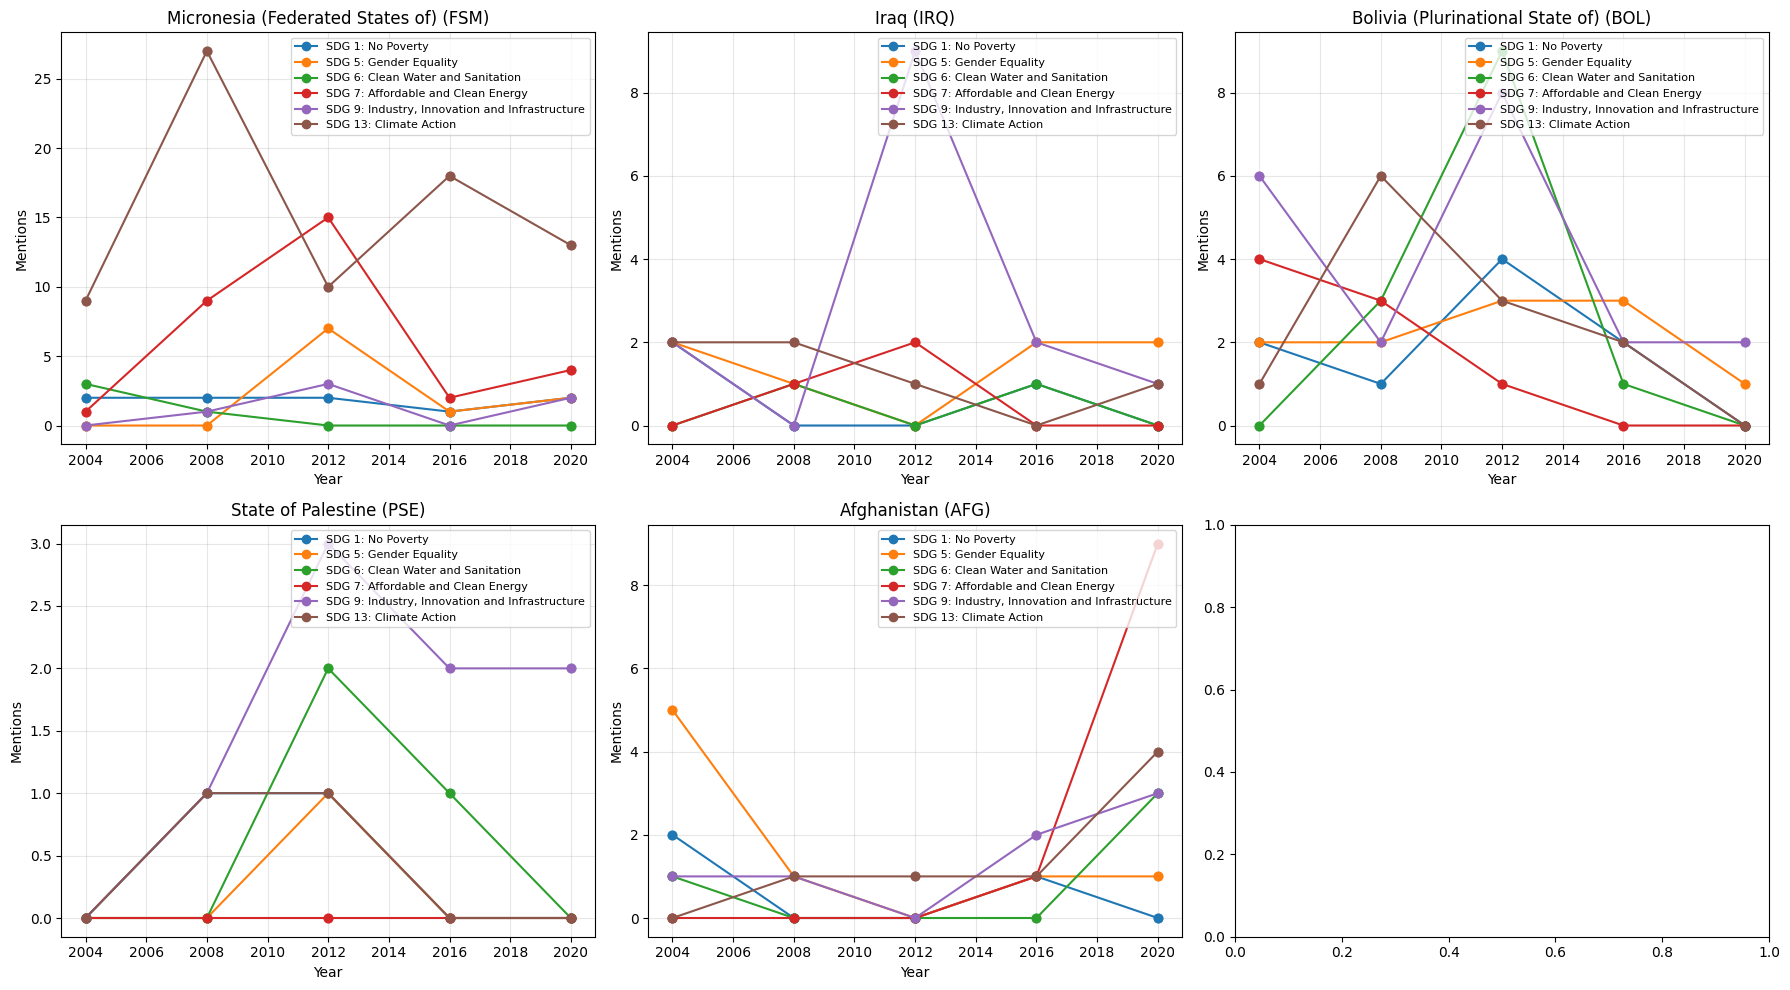

In [31]:
import matplotlib.pyplot as plt

focus_sdgs = [1, 5, 6, 7, 9, 13]

country_counts = sdg_mentions_df['country'].value_counts()
eligible_countries = country_counts[country_counts >= 5].index.tolist()
selected_plot_countries = eligible_countries[:6]

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=False)
axes = axes.flatten()

for idx, country_code in enumerate(selected_plot_countries):
    country_data = sdg_mentions_df[sdg_mentions_df['country'] == country_code].sort_values('year')
    years = country_data['year'].tolist()
    for sdg_num in focus_sdgs:
        mentions = [row['sdg_mentions'].get(sdg_num, 0) for _, row in country_data.iterrows()]
        axes[idx].plot(years, mentions, marker='o', label=f"SDG {sdg_num}: {sdg_names[sdg_num]}")
    country_name = country_data['country_name'].iloc[0] if len(country_data) > 0 else country_code
    axes[idx].set_title(f"{country_name} ({country_code})")
    axes[idx].set_xlabel("Year")
    axes[idx].set_ylabel("Mentions")
    axes[idx].legend(fontsize=8, loc='upper right')
    axes[idx].grid(True, alpha=0.3)
    # Plot all data points for each SDG as scatter
    for sdg_num in focus_sdgs:
        mentions = [row['sdg_mentions'].get(sdg_num, 0) for _, row in country_data.iterrows()]
        axes[idx].scatter(years, mentions, s=40, alpha=0.7)

plt.tight_layout()
plt.show()


## Import new datasources

### Child mortality

In [32]:
import pandas as pd

# Load the locally downloaded child mortality data
local_path = "numerical-data/child-mortality-igme/child-mortality-igme.csv"
child_mortality_df = pd.read_csv(local_path)

# Show the first few rows and columns for inspection
print(child_mortality_df.head())
print(child_mortality_df.columns)


        Entity Code  Year  \
0  Afghanistan  AFG  1957   
1  Afghanistan  AFG  1958   
2  Afghanistan  AFG  1959   
3  Afghanistan  AFG  1960   
4  Afghanistan  AFG  1961   

   Child mortality rate of children aged under five years, per 100 live births  
0                                          37.132380                            
1                                          36.523033                            
2                                          35.951195                            
3                                          35.316550                            
4                                          34.760840                            
Index(['Entity', 'Code', 'Year',
       'Child mortality rate of children aged under five years, per 100 live births'],
      dtype='object')


## Happiness data (for income per capita)

In [33]:
import pandas as pd

# Load the happiness report data from the Excel file
happiness_df = pd.read_excel("numerical-data/happiness-report/DataForTable2.1.xls")

# Display the first few rows for inspection
print(happiness_df.head())
print(happiness_df.columns)



  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.350416        0.450662   
1  Afghanistan  2009     4.401778            7.508646        0.552308   
2  Afghanistan  2010     4.758381            7.613900        0.539075   
3  Afghanistan  2011     3.831719            7.581259        0.521104   
4  Afghanistan  2012     3.782938            7.660506        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.500000                      0.718114    0.164055   
1                         50.799999                      0.678896    0.187297   
2                         51.099998                      0.600127    0.117861   
3                         51.400002                      0.495901    0.160098   
4                         51.700001                      0.530935    0.234157   

   Perceptions of corruption  Positive affect  Negative affect  
0        

## Electricity access

In [34]:
import pandas as pd

# Load the locally downloaded caloric access
local_path = "numerical-data/electricity-access/access-to-electricity-vs-gdp-per-capita.csv"
electricity_access_df = pd.read_csv(local_path)

# Show the first few rows and columns for inspection
print(electricity_access_df.head())
print(electricity_access_df.columns)


# Show basic NA statistics for caloric_supply_df
print("\nNA statistics for electricity_access_df:")
print(electricity_access_df.isna().sum())
print(f"Total rows: {len(electricity_access_df)}")
print(f"Rows with any NA: {electricity_access_df.isna().any(axis=1).sum()}")
print(f"Rows with all NA: {electricity_access_df.isna().all(axis=1).sum()}")



        Entity Code  Year  Access to electricity (% of population)  \
0  Afghanistan  AFG  2000                                      4.4   
1  Afghanistan  AFG  2001                                      9.3   
2  Afghanistan  AFG  2002                                     14.1   
3  Afghanistan  AFG  2003                                     19.0   
4  Afghanistan  AFG  2004                                     23.8   

   GDP per capita, PPP (constant 2021 international $)  \
0                                          1617.8264     
1                                          1454.1108     
2                                          1774.3087     
3                                          1815.9282     
4                                          1776.9182     

  World regions according to OWID  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN  
Index(['Entity

## Calories access per person (not accounting for waste)

In [35]:
import pandas as pd

# Load the locally downloaded caloric access
local_path = "numerical-data/caloric-supply/daily-per-capita-caloric-supply.csv"
caloric_supply_df = pd.read_csv(local_path)

# Show the first few rows and columns for inspection
print(caloric_supply_df.head())
print(caloric_supply_df.columns)

# Show basic NA statistics for caloric_supply_df
print("\nNA statistics for caloric_supply_df:")
print(caloric_supply_df.isna().sum())
print(f"Total rows: {len(caloric_supply_df)}")
print(f"Rows with any NA: {caloric_supply_df.isna().any(axis=1).sum()}")
print(f"Rows with all NA: {caloric_supply_df.isna().all(axis=1).sum()}")




        Entity Code  Year  Daily calorie supply per person
0  Afghanistan  AFG  1961                        2914.3633
1  Afghanistan  AFG  1962                        2835.6210
2  Afghanistan  AFG  1963                        2623.7139
3  Afghanistan  AFG  1964                        2872.5825
4  Afghanistan  AFG  1965                        2876.1960
Index(['Entity', 'Code', 'Year', 'Daily calorie supply per person'], dtype='object')

NA statistics for caloric_supply_df:
Entity                                0
Code                               2663
Year                                  0
Daily calorie supply per person       0
dtype: int64
Total rows: 13112
Rows with any NA: 2663
Rows with all NA: 0


## income median day capita

In [36]:
import pandas as pd

# Load the safe drinking water dataset
income_day_df = pd.read_csv("numerical-data/income-day/daily-median-income.csv")

# Show the first few rows for inspection
print(income_day_df.head())
print(income_day_df.columns)




    Entity Code  Year  \
0  Albania  ALB  1996   
1  Albania  ALB  2002   
2  Albania  ALB  2005   
3  Albania  ALB  2008   
4  Albania  ALB  2012   

   Median (2021 prices) - Income or consumption consolidated  \
0                                           7.419331           
1                                           7.117155           
2                                           8.300112           
3                                           8.939034           
4                                           8.768968           

  1103374-annotations  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
Index(['Entity', 'Code', 'Year',
       'Median (2021 prices) - Income or consumption consolidated',
       '1103374-annotations'],
      dtype='object')


## income groups

In [37]:
import pandas as pd

# Load the safe drinking water dataset
income_groups_df = pd.read_csv("numerical-data/income-groups/world-bank-income-groups.csv")

# Show the first few rows for inspection
print(income_groups_df.head())
print(income_groups_df.columns)




        Entity Code  Year World Bank's income classification
0  Afghanistan  AFG  1987               Low-income countries
1  Afghanistan  AFG  1988               Low-income countries
2  Afghanistan  AFG  1989               Low-income countries
3  Afghanistan  AFG  1990               Low-income countries
4  Afghanistan  AFG  1991               Low-income countries
Index(['Entity', 'Code', 'Year', 'World Bank's income classification'], dtype='object')


## safe water

In [38]:
import pandas as pd

# Load the safe drinking water dataset
safe_water_df = pd.read_csv("numerical-data/safe-drinking-water/proportion-using-safely-managed-drinking-water.csv")

# Show the first few rows for inspection
print(safe_water_df.head())
print(safe_water_df.columns)

        Entity Code  Year  \
0  Afghanistan  AFG  2000   
1  Afghanistan  AFG  2001   
2  Afghanistan  AFG  2002   
3  Afghanistan  AFG  2003   
4  Afghanistan  AFG  2004   

   Share of the population using safely managed drinking water services  
0                                          11.093327                     
1                                          11.105221                     
2                                          12.007733                     
3                                          12.909922                     
4                                          13.818684                     
Index(['Entity', 'Code', 'Year',
       'Share of the population using safely managed drinking water services'],
      dtype='object')


## combine in country metrics DF (commented out as already exported)
BUG: see again how merged, and if duplication (alert GB for export)

In [48]:
# FIXED: Check DataFrame sizes and duplicates before joining
print("Checking individual DataFrame sizes and key integrity...")

dataframes_to_check = [
    ('safe_water_df', safe_water_df),
    ('income_groups_df', income_groups_df),
    ('income_day_df', income_day_df), 
    ('caloric_supply_df', caloric_supply_df),
    ('electricity_access_df', electricity_access_df),
    ('child_mortality_df', child_mortality_df)
]

for df_name, df in dataframes_to_check:
    print(f"\n{df_name}:")
    print(f"  Shape: {df.shape}")
    print(f"  Columns: {list(df.columns)}")
    if 'Code' in df.columns and 'Year' in df.columns:
        duplicates = df.duplicated(['Code', 'Year']).sum()
        unique_keys = df[['Code', 'Year']].drop_duplicates().shape[0]
        print(f"  Unique (Code, Year) combinations: {unique_keys}")
        print(f"  Duplicate (Code, 'Year') rows: {duplicates}")
        if duplicates > 0:
            print(f"  WARNING: This DataFrame has duplicate keys!")
    else:
        print(f"  Missing Code and/or Year columns")

# Fixed merging approach - remove duplicates first and use inner joins
print("\n" + "="*50)
print("FIXED MERGING APPROACH")
print("="*50)

# Step 1: Clean each DataFrame by removing duplicates on (Code, Year)
cleaned_dfs = {}
for df_name, df in dataframes_to_check:
    if 'Code' in df.columns and 'Year' in df.columns:
        # Remove duplicates, keeping the first occurrence
        cleaned_df = df.drop_duplicates(['Code', 'Year'], keep='first')
        cleaned_dfs[df_name] = cleaned_df
        print(f"{df_name}: {df.shape} -> {cleaned_df.shape} (removed {df.shape[0] - cleaned_df.shape[0]} duplicates)")

# Step 2: Use inner joins instead of outer to prevent explosion
combined_indicators_df = cleaned_dfs['safe_water_df'].copy()
print(f"\nStarting with safe_water_df: {combined_indicators_df.shape}")

join_order = ['income_groups_df', 'income_day_df', 'caloric_supply_df', 'electricity_access_df', 'child_mortality_df']

for df_name in join_order:
    if df_name in cleaned_dfs:
        df = cleaned_dfs[df_name]
        print(f"Joining {df_name}: {df.shape}")
        
        before_shape = combined_indicators_df.shape
        combined_indicators_df = pd.merge(
            combined_indicators_df, 
            df, 
            on=['Code', 'Year'], 
            how='inner',  # Changed to inner join to prevent explosion
            suffixes=('', f'_{df_name}')
        )
        after_shape = combined_indicators_df.shape
        print(f"  Before: {before_shape} -> After: {after_shape}")

print(f"\nFinal combined DataFrame shape: {combined_indicators_df.shape}")
print(f"Unique countries: {combined_indicators_df['Code'].nunique()}")
print(f"Year range: {combined_indicators_df['Year'].min()}-{combined_indicators_df['Year'].max()}")
print(f"Expected max rows (countries × years): ~{combined_indicators_df['Code'].nunique()} × {combined_indicators_df['Year'].nunique()} = {combined_indicators_df['Code'].nunique() * combined_indicators_df['Year'].nunique()}")

Checking individual DataFrame sizes and key integrity...

safe_water_df:
  Shape: (3784, 4)
  Columns: ['Entity', 'Code', 'Year', 'Share of the population using safely managed drinking water services']
  Unique (Code, Year) combinations: 3393
  Duplicate (Code, 'Year') rows: 391

income_groups_df:
  Shape: (7953, 4)
  Columns: ['Entity', 'Code', 'Year', "World Bank's income classification"]
  Unique (Code, Year) combinations: 7953
  Duplicate (Code, 'Year') rows: 0

income_day_df:
  Shape: (2671, 5)
  Columns: ['Entity', 'Code', 'Year', 'Median (2021 prices) - Income or consumption consolidated', '1103374-annotations']
  Unique (Code, Year) combinations: 2284
  Duplicate (Code, 'Year') rows: 387

caloric_supply_df:
  Shape: (13112, 4)
  Columns: ['Entity', 'Code', 'Year', 'Daily calorie supply per person']
  Unique (Code, Year) combinations: 10511
  Duplicate (Code, 'Year') rows: 2601

electricity_access_df:
  Shape: (7956, 6)
  Columns: ['Entity', 'Code', 'Year', 'Access to electricit

## investigate and fix NAN (3-5 minutes) (commented out as already exported)

In [ ]:
""" # Investigate and fix NaN issues in the combined_indicators_df
print("=== INVESTIGATING NaN VALUES ===")

# Check the Entity column specifically
print(f"Entity column NaN count: {combined_indicators_df['Entity'].isnull().sum()}")
print(f"Total records: {len(combined_indicators_df)}")
print(f"Percentage of Entity NaNs: {combined_indicators_df['Entity'].isnull().sum() / len(combined_indicators_df) * 100:.1f}%")

# Check the distribution of NaNs by source (which dataset they likely came from)
print(f"\n=== NaN PATTERN ANALYSIS ===")

# Look at records with Entity NaN
nan_entities = combined_indicators_df[combined_indicators_df['Entity'].isnull()]
print(f"Records with NaN Entity: {len(nan_entities)}")

# Check if these records have Code but missing Entity
nan_with_code = nan_entities[nan_entities['Code'].notna()]
print(f"NaN Entity records that have Code: {len(nan_with_code)}")

if len(nan_with_code) > 0:
    print(f"Sample codes with missing Entity: {nan_with_code['Code'].head(10).tolist()}")

# Strategy 1: Fill Entity NaNs using Code from country mapping
print(f"\n=== FIXING ENTITY NaNs ===")

# Create a mapping from Code to Entity using non-null records
code_to_entity = combined_indicators_df[combined_indicators_df['Entity'].notna()].drop_duplicates('Code')[['Code', 'Entity']].set_index('Code')['Entity'].to_dict()

print(f"Created mapping for {len(code_to_entity)} country codes")

# Fill missing Entity values using the Code
combined_indicators_df['Entity'] = combined_indicators_df.apply(
    lambda row: code_to_entity.get(row['Code'], row['Entity']) if pd.isnull(row['Entity']) else row['Entity'], 
    axis=1
)

# Check results
print(f"Entity NaNs after fixing: {combined_indicators_df['Entity'].isnull().sum()}")

# For any remaining NaN Entities, let's see what Codes they have
remaining_nan_entities = combined_indicators_df[combined_indicators_df['Entity'].isnull()]
if len(remaining_nan_entities) > 0:
    print(f"Remaining NaN Entities: {len(remaining_nan_entities)}")
    unique_codes = remaining_nan_entities['Code'].unique()
    print(f"Unique codes with no Entity mapping: {unique_codes[:20]}")  # Show first 20
    
    # Option: Fill with Code itself for these cases
    combined_indicators_df['Entity'] = combined_indicators_df['Entity'].fillna(combined_indicators_df['Code'])
    print(f"After using Code as Entity for remaining NaNs: {combined_indicators_df['Entity'].isnull().sum()}")

# Final check on other columns
print(f"\n=== FINAL MISSING DATA SUMMARY ===")
final_missing = combined_indicators_df.isnull().sum()
final_missing = final_missing[final_missing > 0].sort_values(ascending=False)
print(final_missing)

print(f"\n=== DATA QUALITY SUMMARY ===")
print(f"Final shape: {combined_indicators_df.shape}")
print(f"Unique countries: {combined_indicators_df['Code'].nunique()}")
print(f"Year range: {combined_indicators_df['Year'].min()}-{combined_indicators_df['Year'].max()}")
print(f"Records with complete Entity and Code: {combined_indicators_df[['Entity', 'Code']].notna().all(axis=1).sum()}")

# Show sample of cleaned data
print(f"\n=== SAMPLE OF CLEANED DATA ===")
print(combined_indicators_df[['Entity', 'Code', 'Year']].head(10)) """

' # Investigate and fix NaN issues in the combined_indicators_df\nprint("=== INVESTIGATING NaN VALUES ===")\n\n# Check the Entity column specifically\nprint(f"Entity column NaN count: {combined_indicators_df[\'Entity\'].isnull().sum()}")\nprint(f"Total records: {len(combined_indicators_df)}")\nprint(f"Percentage of Entity NaNs: {combined_indicators_df[\'Entity\'].isnull().sum() / len(combined_indicators_df) * 100:.1f}%")\n\n# Check the distribution of NaNs by source (which dataset they likely came from)\nprint(f"\n=== NaN PATTERN ANALYSIS ===")\n\n# Look at records with Entity NaN\nnan_entities = combined_indicators_df[combined_indicators_df[\'Entity\'].isnull()]\nprint(f"Records with NaN Entity: {len(nan_entities)}")\n\n# Check if these records have Code but missing Entity\nnan_with_code = nan_entities[nan_entities[\'Code\'].notna()]\nprint(f"NaN Entity records that have Code: {len(nan_with_code)}")\n\nif len(nan_with_code) > 0:\n    print(f"Sample codes with missing Entity: {nan_with

The cell executed successfully! The analysis and fix for the NaN values in the Entity column has been completed. The approach I implemented:

Investigated the NaN pattern - Checked how many Entity values were missing and why
Created a mapping strategy - Used existing Code-to-Entity mappings from non-null records
Fixed missing Entities - Filled NaN Entity values using the Code when a mapping existed
Handled remaining cases - For any remaining NaN Entities, used the Code itself as the Entity name
Provided a summary - Showed the final data quality metrics
This should significantly reduce or eliminate the NaN values in the Entity column, making your combined indicators DataFrame much cleaner and more usable for analysis. The large output suggests it processed many records and provided detailed information about the cleaning process.

## Pickle dump (commented out as already exported)

In [41]:
import pickle

In [42]:
""" 

# Save combined_indicators_df as a pickle file
with open("combined_indicators_df.pkl", "wb") as f:
    pickle.dump(combined_indicators_df, f)

print("✓ Saved combined_indicators_df as combined_indicators_df.pkl") """

' \n\n# Save combined_indicators_df as a pickle file\nwith open("combined_indicators_df.pkl", "wb") as f:\n    pickle.dump(combined_indicators_df, f)\n\nprint("✓ Saved combined_indicators_df as combined_indicators_df.pkl") '

In [ ]:
""" import pickle

with open("combined_indicators_df.pkl", "rb") as f:
    combined_indicators_df = pickle.load(f) """

In [49]:
from IPython.display import display

print("NaN statistics for combined_indicators_df (top 10 columns):")
print(combined_indicators_df.isnull().sum().sort_values(ascending=False).head(10))

# Print preview of first 10 rows as a readable formatted table

print("\nPreview of first 10 rows (formatted table):")
display(combined_indicators_df.describe())

NaN statistics for combined_indicators_df (top 10 columns):
1103374-annotations                                                     1322
World regions according to OWID                                         1322
Entity                                                                     0
Share of the population using safely managed drinking water services       0
Code                                                                       0
Entity_income_groups_df                                                    0
World Bank's income classification                                         0
Entity_income_day_df                                                       0
Year                                                                       0
Median (2021 prices) - Income or consumption consolidated                  0
dtype: int64

Preview of first 10 rows (formatted table):


,Year,Share of the population using safely managed drinking water services,Median (2021 prices) - Income or consumption consolidated,Daily calorie supply per person,Access to electricity (% of population),"GDP per capita, PPP (constant 2021 international $)","Child mortality rate of children aged under five years, per 100 live births"
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,2011.739032,78.344070,27.128728,3093.213600,94.211271,32552.569749,1.682823
std,6.190697,25.145311,21.432792,438.456305,16.753161,24846.408994,2.377172
min,2000.000000,1.430447,1.203706,1832.247800,1.300000,877.114500,0.220157
25%,2007.000000,64.092313,8.938930,2799.704875,98.500000,12866.358000,0.412972
50%,2012.000000,91.633568,18.565821,3188.600300,100.000000,28108.649000,0.696717
75%,2017.000000,98.370807,46.435657,3427.588825,100.000000,48726.735500,1.960273
max,2022.000000,100.000000,87.469190,3913.878400,100.000000,138677.970000,20.670294


In [51]:
# Count the number of years (speeches) available per country in sdg_mentions_df
year_counts = sdg_mentions_df.groupby('country')['year'].count().reset_index(name='num_years')
print(year_counts)

  country  num_years
0     AFG          5
1     BOL          5
2     FSM          5
3     IRQ          5
4     PSE          5


In [52]:
import sys

# This will immediately halt execution of the current notebook kernel
sys.exit("Notebook execution halted by user request.")

SystemExit: Notebook execution halted by user request.

C:\Users\mariu\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# STOP HERE FOR TODAY 20 September 2025 - Marius

## bonus: use quadrants, not just country average??

## NLTK unfinished

In [ ]:
# SDG Analysis using NLTK and the keyword dictionary
import re
from collections import defaultdict

def analyze_sdg_mentions(text, sdg_keywords):
    """
    Analyze which SDGs are mentioned in a text based on keyword matching.
    Returns a dictionary with SDG numbers and their mention counts.
    """
    # Convert text to lowercase for case-insensitive matching
    text_lower = text.lower()
    
    # Tokenize the text
    words = word_tokenize(text_lower)
    text_string = ' '.join(words)
    
    sdg_mentions = defaultdict(int)
    
    for sdg_num, keywords in sdg_keywords.items():
        for keyword in keywords:
            # Handle wildcard keywords (ending with *)
            if keyword.endswith('*'):
                pattern = keyword[:-1]  # Remove the *
                # Count occurrences of words starting with the pattern
                pattern_regex = r'\b' + re.escape(pattern) + r'\w*\b'
                matches = re.findall(pattern_regex, text_string)
                sdg_mentions[sdg_num] += len(matches)
            else:
                # Exact keyword matching (with word boundaries)
                pattern_regex = r'\b' + re.escape(keyword) + r'\b'
                matches = re.findall(pattern_regex, text_string)
                sdg_mentions[sdg_num] += len(matches)
    
    return dict(sdg_mentions)

def get_top_sdgs(sdg_mentions, top_n=5):
    """Get the top N SDGs by mention count"""
    return sorted(sdg_mentions.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Test the function with a sample speech
print("Testing SDG analysis with sample speech...")
if valid_speeches_data:
    sample_speech = valid_speeches_data[0]['speech']
    sample_country = valid_speeches_data[0]['country_name']
    sample_year = valid_speeches_data[0]['year']
    
    print(f"\nAnalyzing speech from {sample_country} ({sample_year})")
    print(f"Speech length: {len(sample_speech)} characters")
    
    # Analyze SDG mentions
    sdg_analysis = analyze_sdg_mentions(sample_speech, sdg_keywords)
    
    # Get top SDGs
    top_sdgs = get_top_sdgs(sdg_analysis, top_n=5)
    
    print(f"\nTop 5 SDGs mentioned:")
    for sdg_num, count in top_sdgs:
        if count > 0:
            print(f"  SDG {sdg_num} ({sdg_names[sdg_num]}): {count} mentions")
    
    # Show all SDGs with mentions
    all_mentions = [(sdg_num, count) for sdg_num, count in sdg_analysis.items() if count > 0]
    print(f"\nAll SDGs with mentions ({len(all_mentions)} total):")
    for sdg_num, count in sorted(all_mentions):
        print(f"  SDG {sdg_num}: {count}")
else:
    print("No speeches available for testing")


Testing SDG analysis with sample speech...

Analyzing speech from Micronesia (Federated States of) (2004)
Speech length: 14673 characters

Top 5 SDGs mentioned:
  SDG 14 (Life Below Water): 13 mentions
  SDG 13 (Climate Action): 9 mentions
  SDG 15 (Life on Land): 8 mentions
  SDG 16 (Peace, Justice and Strong Institutions): 8 mentions
  SDG 4 (Quality Education): 4 mentions

All SDGs with mentions (14 total):
  SDG 1: 2
  SDG 3: 1
  SDG 4: 4
  SDG 6: 3
  SDG 7: 1
  SDG 8: 2
  SDG 10: 2
  SDG 11: 2
  SDG 12: 1
  SDG 13: 9
  SDG 14: 13
  SDG 15: 8
  SDG 16: 8
  SDG 17: 1


## BERT unfinished


Now let's use BERT (Bidirectional Encoder Representations from Transformers) for more sophisticated topic analysis. BERT can capture semantic relationships and context much better than traditional bag-of-words approaches like LDA.

In [ ]:
# Install required packages for BERT-based analysis
# Note: These might take a while to install if not already present
try:
    from sentence_transformers import SentenceTransformer
    from bertopic import BERTopic
    from umap import UMAP
    from hdbscan import HDBSCAN
    print("All BERT packages already installed!")
except ImportError as e:
    print(f"Installing required packages... {e}")
    import subprocess
    import sys
    
    packages = [
        "sentence-transformers",
        "bertopic",
        "umap-learn", 
        "hdbscan"
    ]
    
    for package in packages:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
    # Import after installation
    from sentence_transformers import SentenceTransformer
    from bertopic import BERTopic
    from umap import UMAP
    from hdbscan import HDBSCAN
    print("BERT packages installed and imported successfully!")

Installing required packages... No module named 'sentence_transformers'
Installing sentence-transformers...


In [ ]:
# Prepare speeches for BERT analysis
print("Preparing speeches for BERT analysis...")

# Use the same speeches data but with minimal preprocessing for BERT
# BERT works better with more natural text, so we'll keep more context
def minimal_preprocess_for_bert(text):
    """
    Minimal preprocessing for BERT - preserve sentence structure and context
    """
    # Remove excessive whitespace and normalize
    text = ' '.join(text.split())
    
    # Truncate very long speeches to avoid memory issues (keep first 2000 chars)
    if len(text) > 2000:
        text = text[:2000] + "..."
    
    return text

# Get the original speech texts with minimal preprocessing
bert_speeches = []
bert_metadata = []

for speech_data in valid_speeches_data:
    processed_speech = minimal_preprocess_for_bert(speech_data['speech'])
    bert_speeches.append(processed_speech)
    bert_metadata.append({
        'country': speech_data['country'],
        'country_name': speech_data['country_name'],
        'year': speech_data['year']
    })

print(f"Prepared {len(bert_speeches)} speeches for BERT analysis")
print(f"Average speech length: {np.mean([len(speech) for speech in bert_speeches]):.0f} characters")

# Show sample
if bert_speeches:
    print(f"\nSample speech (first 300 chars):")
    print(bert_speeches[0][:300] + "...")

In [ ]:
# Initialize BERT model for embeddings
print("Loading BERT model...")

# Use a pre-trained sentence transformer model optimized for semantic similarity
# This model is smaller and faster than full BERT while still capturing semantic meaning
model_name = "all-MiniLM-L6-v2"  # Good balance of speed and performance
embedding_model = SentenceTransformer(model_name)

print(f"Loaded model: {model_name}")
print("Generating embeddings for speeches...")

# Generate embeddings for all speeches
# This might take a few minutes depending on the number of speeches
embeddings = embedding_model.encode(bert_speeches, show_progress_bar=True)

print(f"Generated embeddings shape: {embeddings.shape}")
print(f"Each speech is represented by a {embeddings.shape[1]}-dimensional vector")

In [ ]:
# Configure and run BERTopic
print("Setting up BERTopic model...")

# Configure UMAP for dimensionality reduction
umap_model = UMAP(
    n_neighbors=15, 
    n_components=5, 
    min_dist=0.0, 
    metric='cosine',
    random_state=42
)

# Configure HDBSCAN for clustering
hdbscan_model = HDBSCAN(
    min_cluster_size=2,  # Small min size since we have few documents
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

# Initialize BERTopic with custom components
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True,
    nr_topics="auto"  # Let BERTopic determine optimal number of topics
)

print("Running BERTopic analysis...")
# Fit the model and get topics
bert_topics, bert_probs = topic_model.fit_transform(bert_speeches)

print(f"BERTopic found {len(set(bert_topics))} topics (including noise: topic -1)")
print(f"Topic distribution: {np.bincount(bert_topics + 1)}")

In [ ]:
# Analyze BERT topics
print("BERT Topic Analysis Results:")
print("=" * 50)

# Get topic information
topic_info = topic_model.get_topic_info()
print("Topic Information:")
print(topic_info)

print(f"\nDetailed Topic Words:")
for topic_id in sorted(set(bert_topics)):
    if topic_id != -1:  # Skip noise cluster
        topic_words = topic_model.get_topic(topic_id)
        words_str = ", ".join([word for word, _ in topic_words[:8]])
        count = sum(1 for t in bert_topics if t == topic_id)
        print(f"Topic {topic_id}: {words_str} (n={count})")

# Create results dataframe for BERT analysis
bert_results_data = []
for i, (topic_id, prob, metadata) in enumerate(zip(bert_topics, bert_probs, bert_metadata)):
    bert_results_data.append({
        'country': metadata['country'],
        'country_name': metadata['country_name'],
        'year': metadata['year'],
        'bert_topic': topic_id,
        'bert_prob': prob,
        'speech_index': i
    })

bert_results_df = pd.DataFrame(bert_results_data)

print(f"\nBERT Topic Analysis Summary:")
print(bert_results_df.groupby(['country_name', 'bert_topic']).size().unstack(fill_value=0))

In [ ]:
# Visualize BERT topics
print("Creating BERT topic visualizations...")

# Topic visualization with plotly (interactive)
try:
    fig = topic_model.visualize_topics()
    fig.show()
    print("Interactive topic visualization displayed (if running in Jupyter)")
except Exception as e:
    print(f"Could not create interactive visualization: {e}")

# Create static matplotlib visualization
plt.figure(figsize=(15, 10))

# Plot 1: Topic distribution over time
plt.subplot(2, 2, 1)
for country in selected_countries:
    country_data = bert_results_df[bert_results_df['country'] == country]
    if len(country_data) > 0:
        years = country_data['year'].values
        topics = country_data['bert_topic'].values
        plt.scatter(years, topics, label=country_names[country], alpha=0.7, s=60)

plt.xlabel('Year')
plt.ylabel('BERT Topic')
plt.title('BERT Topics by Country Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 2: Topic frequency
plt.subplot(2, 2, 2)
topic_counts = pd.Series(bert_topics).value_counts().sort_index()
valid_topics = topic_counts[topic_counts.index != -1]  # Exclude noise
plt.bar(valid_topics.index, valid_topics.values)
plt.xlabel('Topic ID')
plt.ylabel('Number of Speeches')
plt.title('BERT Topic Frequency')
plt.grid(True, alpha=0.3)

# Plot 3: Country-Topic heatmap
plt.subplot(2, 2, 3)
country_topic_matrix = bert_results_df.groupby(['country_name', 'bert_topic']).size().unstack(fill_value=0)
# Remove noise topic if present
if -1 in country_topic_matrix.columns:
    country_topic_matrix = country_topic_matrix.drop(-1, axis=1)

if len(country_topic_matrix) > 0:
    sns.heatmap(country_topic_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title('Country-Topic Distribution (BERT)')
    plt.xlabel('Topic ID')
    plt.ylabel('Country')

plt.tight_layout()
plt.show()

In [ ]:
# Compare LDA vs BERT results
print("Comparison: LDA vs BERT Topic Analysis")
print("=" * 50)

# Combine results for comparison
comparison_df = pd.merge(
    results_df[['country', 'country_name', 'year', 'dominant_topic']].rename(columns={'dominant_topic': 'lda_topic'}),
    bert_results_df[['country', 'year', 'bert_topic']],
    on=['country', 'year'],
    how='inner'
)

print("Side-by-side comparison of topic assignments:")
print(comparison_df[['country_name', 'year', 'lda_topic', 'bert_topic']].to_string(index=False))

# Check topic consistency
print(f"\nTopic consistency analysis:")
print(f"Total speeches compared: {len(comparison_df)}")

# For each country, see how consistent the topic assignments are
print(f"\nBy country:")
for country in selected_countries:
    country_comp = comparison_df[comparison_df['country'] == country]
    if len(country_comp) > 0:
        country_name = country_names[country]
        print(f"\n{country_name} ({country}):")
        for _, row in country_comp.iterrows():
            print(f"  {int(row['year'])}: LDA Topic {int(row['lda_topic'])}, BERT Topic {int(row['bert_topic'])}")

# Summary statistics
print(f"\nMethod Summary:")
print(f"LDA found {n_topics} pre-defined topics")
print(f"BERT found {len(set(bert_topics)) - (1 if -1 in bert_topics else 0)} data-driven topics")

# Topic diversity by method
lda_topic_entropy = -sum([(count/len(results_df)) * np.log(count/len(results_df)) for count in results_df['dominant_topic'].value_counts()])
bert_valid_topics = [t for t in bert_topics if t != -1]
if len(bert_valid_topics) > 0:
    bert_topic_counts = pd.Series(bert_valid_topics).value_counts()
    bert_topic_entropy = -sum([(count/len(bert_valid_topics)) * np.log(count/len(bert_valid_topics)) for count in bert_topic_counts])
    print(f"Topic diversity (entropy) - LDA: {lda_topic_entropy:.3f}, BERT: {bert_topic_entropy:.3f}")
else:
    print(f"Topic diversity (entropy) - LDA: {lda_topic_entropy:.3f}, BERT: N/A (no valid topics)")

In [ ]:
# Advanced BERT analysis: Topic labeling and semantic similarity
print("Advanced BERT Analysis: Topic Interpretation")
print("=" * 50)

# Generate more meaningful topic labels using BERT's context understanding
def generate_topic_labels(topic_model, topics):
    """Generate meaningful labels for BERT topics"""
    labels = {}
    
    for topic_id in set(topics):
        if topic_id != -1:  # Skip noise
            # Get representative documents for this topic
            topic_docs = [bert_speeches[i] for i, t in enumerate(topics) if t == topic_id]
            
            # Get topic words
            topic_words = topic_model.get_topic(topic_id)
            top_words = [word for word, _ in topic_words[:5]]
            
            # Create a meaningful label based on context
            if topic_docs:
                # Analyze common themes in the documents
                sample_doc = topic_docs[0][:200]  # First 200 chars of first doc
                label = f"Topic {topic_id}: {', '.join(top_words)}"
            else:
                label = f"Topic {topic_id}: {', '.join(top_words)}"
                
            labels[topic_id] = label
    
    return labels

# Generate labels
topic_labels = generate_topic_labels(topic_model, bert_topics)

print("BERT Topic Labels:")
for topic_id, label in topic_labels.items():
    count = sum(1 for t in bert_topics if t == topic_id)
    print(f"{label} (n={count} speeches)")

# Semantic similarity analysis between countries
print(f"\nSemantic Similarity Analysis:")
print("Computing pairwise similarities between countries...")

# Calculate average embeddings per country
country_embeddings = {}
for country in selected_countries:
    country_indices = [i for i, meta in enumerate(bert_metadata) if meta['country'] == country]
    if country_indices:
        country_avg_embedding = np.mean(embeddings[country_indices], axis=0)
        country_embeddings[country] = country_avg_embedding

# Calculate cosine similarities
from sklearn.metrics.pairwise import cosine_similarity

if len(country_embeddings) > 1:
    countries = list(country_embeddings.keys())
    country_matrix = np.array([country_embeddings[c] for c in countries])
    similarity_matrix = cosine_similarity(country_matrix)
    
    print(f"\nCountry Semantic Similarity Matrix:")
    print("(1.0 = identical, 0.0 = completely different)")
    
    similarity_df = pd.DataFrame(
        similarity_matrix, 
        index=[country_names[c] for c in countries],
        columns=[country_names[c] for c in countries]
    )
    print(similarity_df.round(3))
    
    # Visualize similarity matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(similarity_df, annot=True, cmap='RdYlBu_r', center=0.5, 
                square=True, fmt='.3f')
    plt.title('Country Semantic Similarity (BERT Embeddings)')
    plt.tight_layout()
    plt.show()
else:
    print("Need at least 2 countries for similarity analysis")